# Machine learning models building

In [259]:
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
import pandas as pd
from random import randint
import time
from rouge_score import rouge_scorer
import copy
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('article.csv')
df.drop(columns=['Unnamed: 0', 'Unnamed: 1'], inplace=True)

In [48]:
type(df['articles'])

pandas.core.series.Series

In [49]:
df.head()

,id,title,publication,author,date,year,month,url,articles
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [50]:
parser_list = []
random_list = []
while len(random_list) != 10000:
    tmp = randint(0, len(df['articles']))
    if tmp not in random_list:
        random_list.append(tmp)
for i in random_list:
    parser_list.append(PlaintextParser.from_string(df['articles'][i], Tokenizer('english')))

In [51]:
print(len(parser_list))

10000


In [52]:
textrank_summarizer = TextRankSummarizer()
lexrank_summarizer = LexRankSummarizer()
lsa_summarizer = LsaSummarizer()
luhn_summarizer = LuhnSummarizer()

In [53]:
textrank_summary = []
start = time.time()
for textparser in parser_list:
    textrank_summary.append(textrank_summarizer(textparser.document, 1))
end = time.time() - start
print('Time passed: ', end)
len(textrank_summary)

Time passed:  324.0595908164978


10000

In [54]:
lexrank_summary = []
start = time.time()
for lexparser in parser_list:
    lexrank_summary.append(lexrank_summarizer(lexparser.document, 1))
end = time.time() - start
print('Time passed: ', end)
len(lexrank_summary)

Time passed:  324.0796527862549


10000

In [55]:
luhn_summary = []
start = time.time()
for luhnparser in parser_list:
    luhn_summary.append(luhn_summarizer(luhnparser.document, 1))
end = time.time() - start
print('Time passed: ', end)
len(luhn_summary)

Time passed:  22.59009599685669


10000

In [56]:
lsa_summary = []
start = time.time()
for lsaparser in parser_list:
    lsa_summary.append(lsa_summarizer(lsaparser.document, 1))
end = time.time() - start
print('Time passed: ', end)
len(lsa_summary)

Time passed:  126.66002464294434


10000

In [57]:
title_list = []
for i in random_list:
    tmp = df['title'][i]
    tmp = tmp.replace('\xa0', '')
    title_list.append(tmp)
print(title_list[7384])

Is Trump Really Crumbling?


In [90]:
textr_sum_copy = copy.copy(textrank_summary)
lexr_sum_copy = copy.copy(lexrank_summary)
luhn_sum_copy = copy.copy(luhn_summary)
lsa_sum_copy = copy.copy(lsa_summary)

In [92]:
for i in range(len(textr_sum_copy[0:100])):
    print(i)
    print('textrank: ', textr_sum_copy[i][0])
    print('lexrank: ', lexr_sum_copy[i][0])
    print('luhn: ', luhn_sum_copy[i][0])
    print('lsa: ', lsa_sum_copy[i][0])
    print('actual title: ', title_list[i])

0
textrank:  BALTIMORE  —   A judge on Thursday found the sole officer charged with murder in the death of Freddie Gray not guilty of all counts, leaving prosecutors without a conviction for the third time in the   case that spurred riots and unrest in the city last year.
lexrank:  BALTIMORE  —   A judge on Thursday found the sole officer charged with murder in the death of Freddie Gray not guilty of all counts, leaving prosecutors without a conviction for the third time in the   case that spurred riots and unrest in the city last year.
luhn:  BALTIMORE  —   A judge on Thursday found the sole officer charged with murder in the death of Freddie Gray not guilty of all counts, leaving prosecutors without a conviction for the third time in the   case that spurred riots and unrest in the city last year.
lsa:  With more than 30 witnesses testifying over an   trial, prosecutors attempted to convince Williams that Goodson was culpable in Gray’s death.
actual title:  Baltimore officer acquitted

# ROUGE-score calculating for each ML model

In [290]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(str(textr_sum_copy[0][0]), title_list[0])
scores

{'rouge1': Score(precision=0.8181818181818182, recall=0.2, fmeasure=0.32142857142857145),
 'rouge2': Score(precision=0.1, recall=0.022727272727272728, fmeasure=0.037037037037037035),
 'rougeL': Score(precision=0.6363636363636364, recall=0.15555555555555556, fmeasure=0.25)}

In [319]:
# textrank score; lexrank score; luhn score; lsa score.
summary_score_list = [[], [], [], []]
for i in range(len(textr_sum_copy)):
    if textr_sum_copy[i] != ():
        summary_score_list[0].append(scorer.score(str(textr_sum_copy[i][0]), title_list[i]))
    else:
        summary_score_list[0].append(scorer.score(str(textr_sum_copy[i - 1][0]), title_list[i - 1]))
for i in range(len(lexr_sum_copy)):
    if lexr_sum_copy[i] != ():
        summary_score_list[1].append(scorer.score(str(lexr_sum_copy[i][0]), title_list[i]))
    else:
        summary_score_list[1].append(scorer.score(str(textr_sum_copy[i - 1][0]), title_list[i - 1]))
for i in range(len(luhn_sum_copy)):
    if luhn_sum_copy[i] != ():
        summary_score_list[2].append(scorer.score(str(luhn_sum_copy[i][0]), title_list[i]))
    else:
        summary_score_list[2].append(scorer.score(str(textr_sum_copy[i - 1][0]), title_list[i - 1]))
for i in range(len(lsa_sum_copy)):
    if lsa_sum_copy[i] != ():
        summary_score_list[3].append(scorer.score(str(lsa_sum_copy[i][0]), title_list[i]))
    else:
        summary_score_list[3].append(scorer.score(str(textr_sum_copy[i - 1][0]), title_list[i - 1]))

In [320]:
# textrank, lexrank, luhn, lsa
summary_score_df = []
for i in range(len(summary_score_list)):
    summary_score_df.append(pd.DataFrame(summary_score_list[i]))

In [321]:
summary_score_df[0].head()

,rouge1,rouge2,rougeL
0,"(0.8181818181818182, 0.2, 0.32142857142857145)","(0.1, 0.022727272727272728, 0.037037037037037035)","(0.6363636363636364, 0.15555555555555556, 0.25)"
1,"(0.375, 0.04411764705882353, 0.07894736842105263)","(0.0, 0.0, 0.0)","(0.375, 0.04411764705882353, 0.07894736842105263)"
2,"(0.2777777777777778, 0.19230769230769232, 0.22...","(0.0, 0.0, 0.0)","(0.1111111111111111, 0.07692307692307693, 0.09..."
3,"(0.46153846153846156, 0.17647058823529413, 0.2...","(0.25, 0.09090909090909091, 0.13333333333333333)","(0.46153846153846156, 0.17647058823529413, 0.2..."
4,"(0.2, 0.08695652173913043, 0.12121212121212122)","(0.0, 0.0, 0.0)","(0.1, 0.043478260869565216, 0.06060606060606061)"


In [322]:
print(summary_score_df[0].at[3777, 'rouge1'])
print(summary_score_df[0].at[3777, 'rouge1'][0])
print(summary_score_df[0].at[3777, 'rouge1'][1])
print(summary_score_df[0].at[3777, 'rouge1'][2])

Score(precision=0.25, recall=0.045454545454545456, fmeasure=0.07692307692307693)
0.25
0.045454545454545456
0.07692307692307693


In [323]:
print('textrank: ', textr_sum_copy[3777][0])
print('lexrank: ', lexr_sum_copy[3777][0])
print('luhn: ', luhn_sum_copy[3777][0])
print('lsa: ', lsa_sum_copy[3777][0])
print('title: ', title_list[3777])

textrank:  Yet I still listened to them instruct my brother the day he received his driver’s license: Drive slow; don’t be outside at night; if you’re stopped by the police, always keep your hands in view; never raise your voice; don’t talk back; you’re not like everyone else; this country isn’t safe for you; you should always be on your guard.
lexrank:  Because I know that for all of his achievements  —   two Ivy League degrees and not even a hint of a criminal record  —   at night he’s just another black man driving, and he could be killed like one, too.
luhn:  Yet I still listened to them instruct my brother the day he received his driver’s license: Drive slow; don’t be outside at night; if you’re stopped by the police, always keep your hands in view; never raise your voice; don’t talk back; you’re not like everyone else; this country isn’t safe for you; you should always be on your guard.
lsa:  Philando Castile, shot by police in Falcon Heights, Minn. after being pulled over for a 

# Data visualisation with seaborn and matplotlib

In [324]:
summary_score_df[0].head()

,rouge1,rouge2,rougeL
0,"(0.8181818181818182, 0.2, 0.32142857142857145)","(0.1, 0.022727272727272728, 0.037037037037037035)","(0.6363636363636364, 0.15555555555555556, 0.25)"
1,"(0.375, 0.04411764705882353, 0.07894736842105263)","(0.0, 0.0, 0.0)","(0.375, 0.04411764705882353, 0.07894736842105263)"
2,"(0.2777777777777778, 0.19230769230769232, 0.22...","(0.0, 0.0, 0.0)","(0.1111111111111111, 0.07692307692307693, 0.09..."
3,"(0.46153846153846156, 0.17647058823529413, 0.2...","(0.25, 0.09090909090909091, 0.13333333333333333)","(0.46153846153846156, 0.17647058823529413, 0.2..."
4,"(0.2, 0.08695652173913043, 0.12121212121212122)","(0.0, 0.0, 0.0)","(0.1, 0.043478260869565216, 0.06060606060606061)"


In [325]:
summary_score_df[1].head()

,rouge1,rouge2,rougeL
0,"(0.8181818181818182, 0.2, 0.32142857142857145)","(0.1, 0.022727272727272728, 0.037037037037037035)","(0.6363636363636364, 0.15555555555555556, 0.25)"
1,"(0.25, 0.0392156862745098, 0.06779661016949153)","(0.0, 0.0, 0.0)","(0.25, 0.0392156862745098, 0.06779661016949153)"
2,"(0.7777777777777778, 0.5833333333333334, 0.666...","(0.47058823529411764, 0.34782608695652173, 0.3...","(0.7222222222222222, 0.5416666666666666, 0.619..."
3,"(0.46153846153846156, 0.17647058823529413, 0.2...","(0.25, 0.09090909090909091, 0.13333333333333333)","(0.46153846153846156, 0.17647058823529413, 0.2..."
4,"(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)"


In [326]:
summary_score_df[2].head()

,rouge1,rouge2,rougeL
0,"(0.8181818181818182, 0.2, 0.32142857142857145)","(0.1, 0.022727272727272728, 0.037037037037037035)","(0.6363636363636364, 0.15555555555555556, 0.25)"
1,"(0.375, 0.04411764705882353, 0.07894736842105263)","(0.0, 0.0, 0.0)","(0.375, 0.04411764705882353, 0.07894736842105263)"
2,"(0.7777777777777778, 0.5833333333333334, 0.666...","(0.47058823529411764, 0.34782608695652173, 0.3...","(0.7222222222222222, 0.5416666666666666, 0.619..."
3,"(0.46153846153846156, 0.17647058823529413, 0.2...","(0.25, 0.09090909090909091, 0.13333333333333333)","(0.46153846153846156, 0.17647058823529413, 0.2..."
4,"(0.3, 0.08108108108108109, 0.12765957446808512)","(0.0, 0.0, 0.0)","(0.2, 0.05405405405405406, 0.0851063829787234)"


In [327]:
summary_score_df[3].head()

,rouge1,rouge2,rougeL
0,"(0.18181818181818182, 0.09090909090909091, 0.1...","(0.0, 0.0, 0.0)","(0.18181818181818182, 0.09090909090909091, 0.1..."
1,"(0.25, 0.08333333333333333, 0.125)","(0.0, 0.0, 0.0)","(0.25, 0.08333333333333333, 0.125)"
2,"(0.05555555555555555, 0.05, 0.052631578947368425)","(0.0, 0.0, 0.0)","(0.05555555555555555, 0.05, 0.052631578947368425)"
3,"(0.5384615384615384, 0.20588235294117646, 0.29...","(0.25, 0.09090909090909091, 0.13333333333333333)","(0.46153846153846156, 0.17647058823529413, 0.2..."
4,"(0.2, 0.09090909090909091, 0.12500000000000003)","(0.0, 0.0, 0.0)","(0.1, 0.045454545454545456, 0.06250000000000001)"


In [328]:
print(summary_score_df[0].at[3777, 'rouge1'])
print(summary_score_df[0].at[3777, 'rouge1'][0])
print(summary_score_df[0].at[3777, 'rouge1'][1])
print(summary_score_df[0].at[3777, 'rouge1'][2])

Score(precision=0.25, recall=0.045454545454545456, fmeasure=0.07692307692307693)
0.25
0.045454545454545456
0.07692307692307693


In [329]:
# for each of textrank, lexrank, luhn and lsa: rouge1, rouge2, rougeL, rougeLsum
precision_list = [[[], [], []], [[], [], []], [[], [], []], [[], [], []]]
for i in range(len(summary_score_list[0])):
    precision_list[0][0].append(summary_score_df[0].at[i, 'rouge1'][0])  # textrank rouge1
    precision_list[0][1].append(summary_score_df[0].at[i, 'rouge2'][0])  # textrank rouge2
    precision_list[0][2].append(summary_score_df[0].at[i, 'rougeL'][0])  # textrank rougeL

    precision_list[1][0].append(summary_score_df[1].at[i, 'rouge1'][0])  # lexrank rouge1
    precision_list[1][1].append(summary_score_df[1].at[i, 'rouge2'][0])  # lexrank rouge2
    precision_list[1][2].append(summary_score_df[1].at[i, 'rougeL'][0])  # lexrank rougeL

    precision_list[2][0].append(summary_score_df[2].at[i, 'rouge1'][0])  # luhn rouge1
    precision_list[2][1].append(summary_score_df[2].at[i, 'rouge2'][0])  # luhn rouge2
    precision_list[2][2].append(summary_score_df[2].at[i, 'rougeL'][0])  # luhn rougeL

    precision_list[3][0].append(summary_score_df[3].at[i, 'rouge1'][0])  # lsa rouge1
    precision_list[3][1].append(summary_score_df[3].at[i, 'rouge2'][0])  # lsa rouge2
    precision_list[3][2].append(summary_score_df[3].at[i, 'rougeL'][0])  # lsa rougeL

In [330]:
sns.set(rc={'figure.figsize':(25, 25)})

          textrank      lexrank         luhn          lsa
count  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.307475     0.298590     0.324381     0.213644
std       0.202052     0.222269     0.211199     0.178327
min       0.000000     0.000000     0.000000     0.000000
25%       0.166667     0.125000     0.166667     0.094156
50%       0.285714     0.250000     0.300000     0.181818
75%       0.411765     0.428571     0.444444     0.285714
max       1.000000     1.000000     1.000000     1.000000


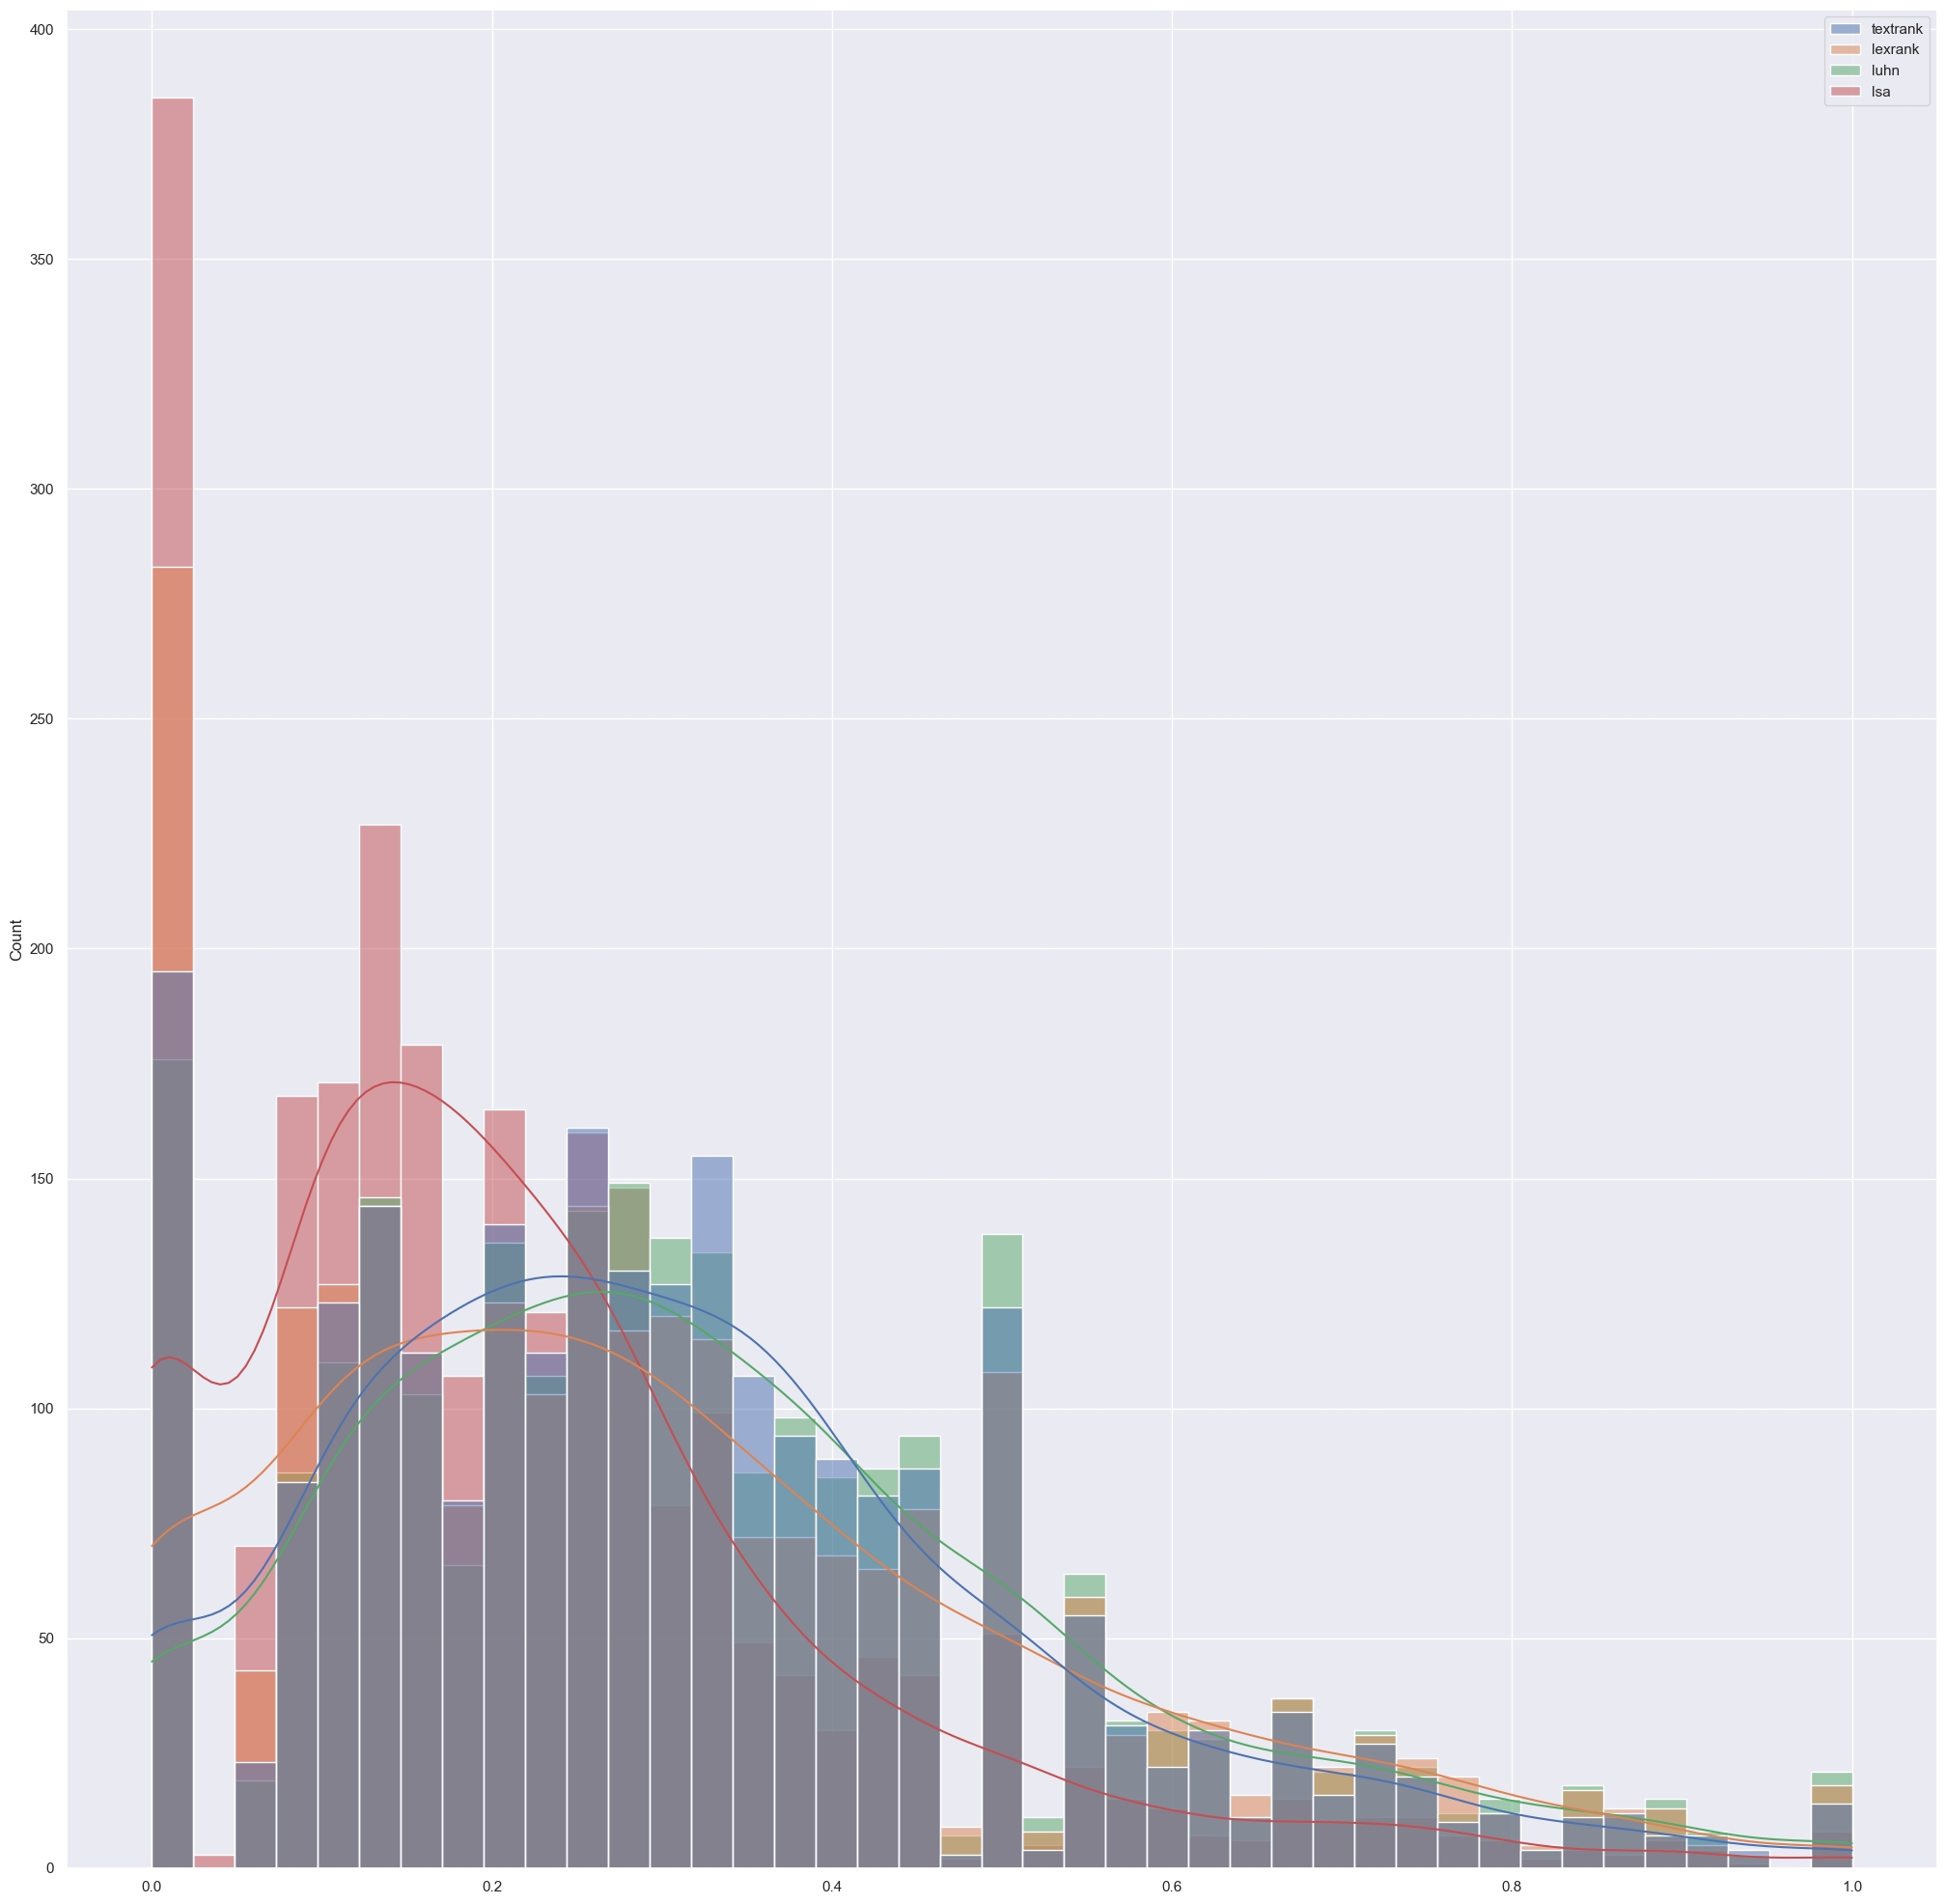

In [345]:
df_precision_rouge1 = pd.DataFrame.from_dict(
    data=dict(textrank=precision_list[0][0], lexrank=precision_list[1][0], luhn=precision_list[2][0], lsa=precision_list[3][0]),
    orient='index'
).T
df_precision_rouge1_sample = df_precision_rouge1.sample(2500)
print(df_precision_rouge1_sample.describe())
ax = sns.histplot(data=df_precision_rouge1_sample, kde=True)

          textrank      lexrank         luhn          lsa
count  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.058499     0.071066     0.071876     0.040354
std       0.110720     0.129672     0.127809     0.100991
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000
75%       0.090909     0.100000     0.111111     0.000000
max       0.875000     0.875000     0.875000     0.875000


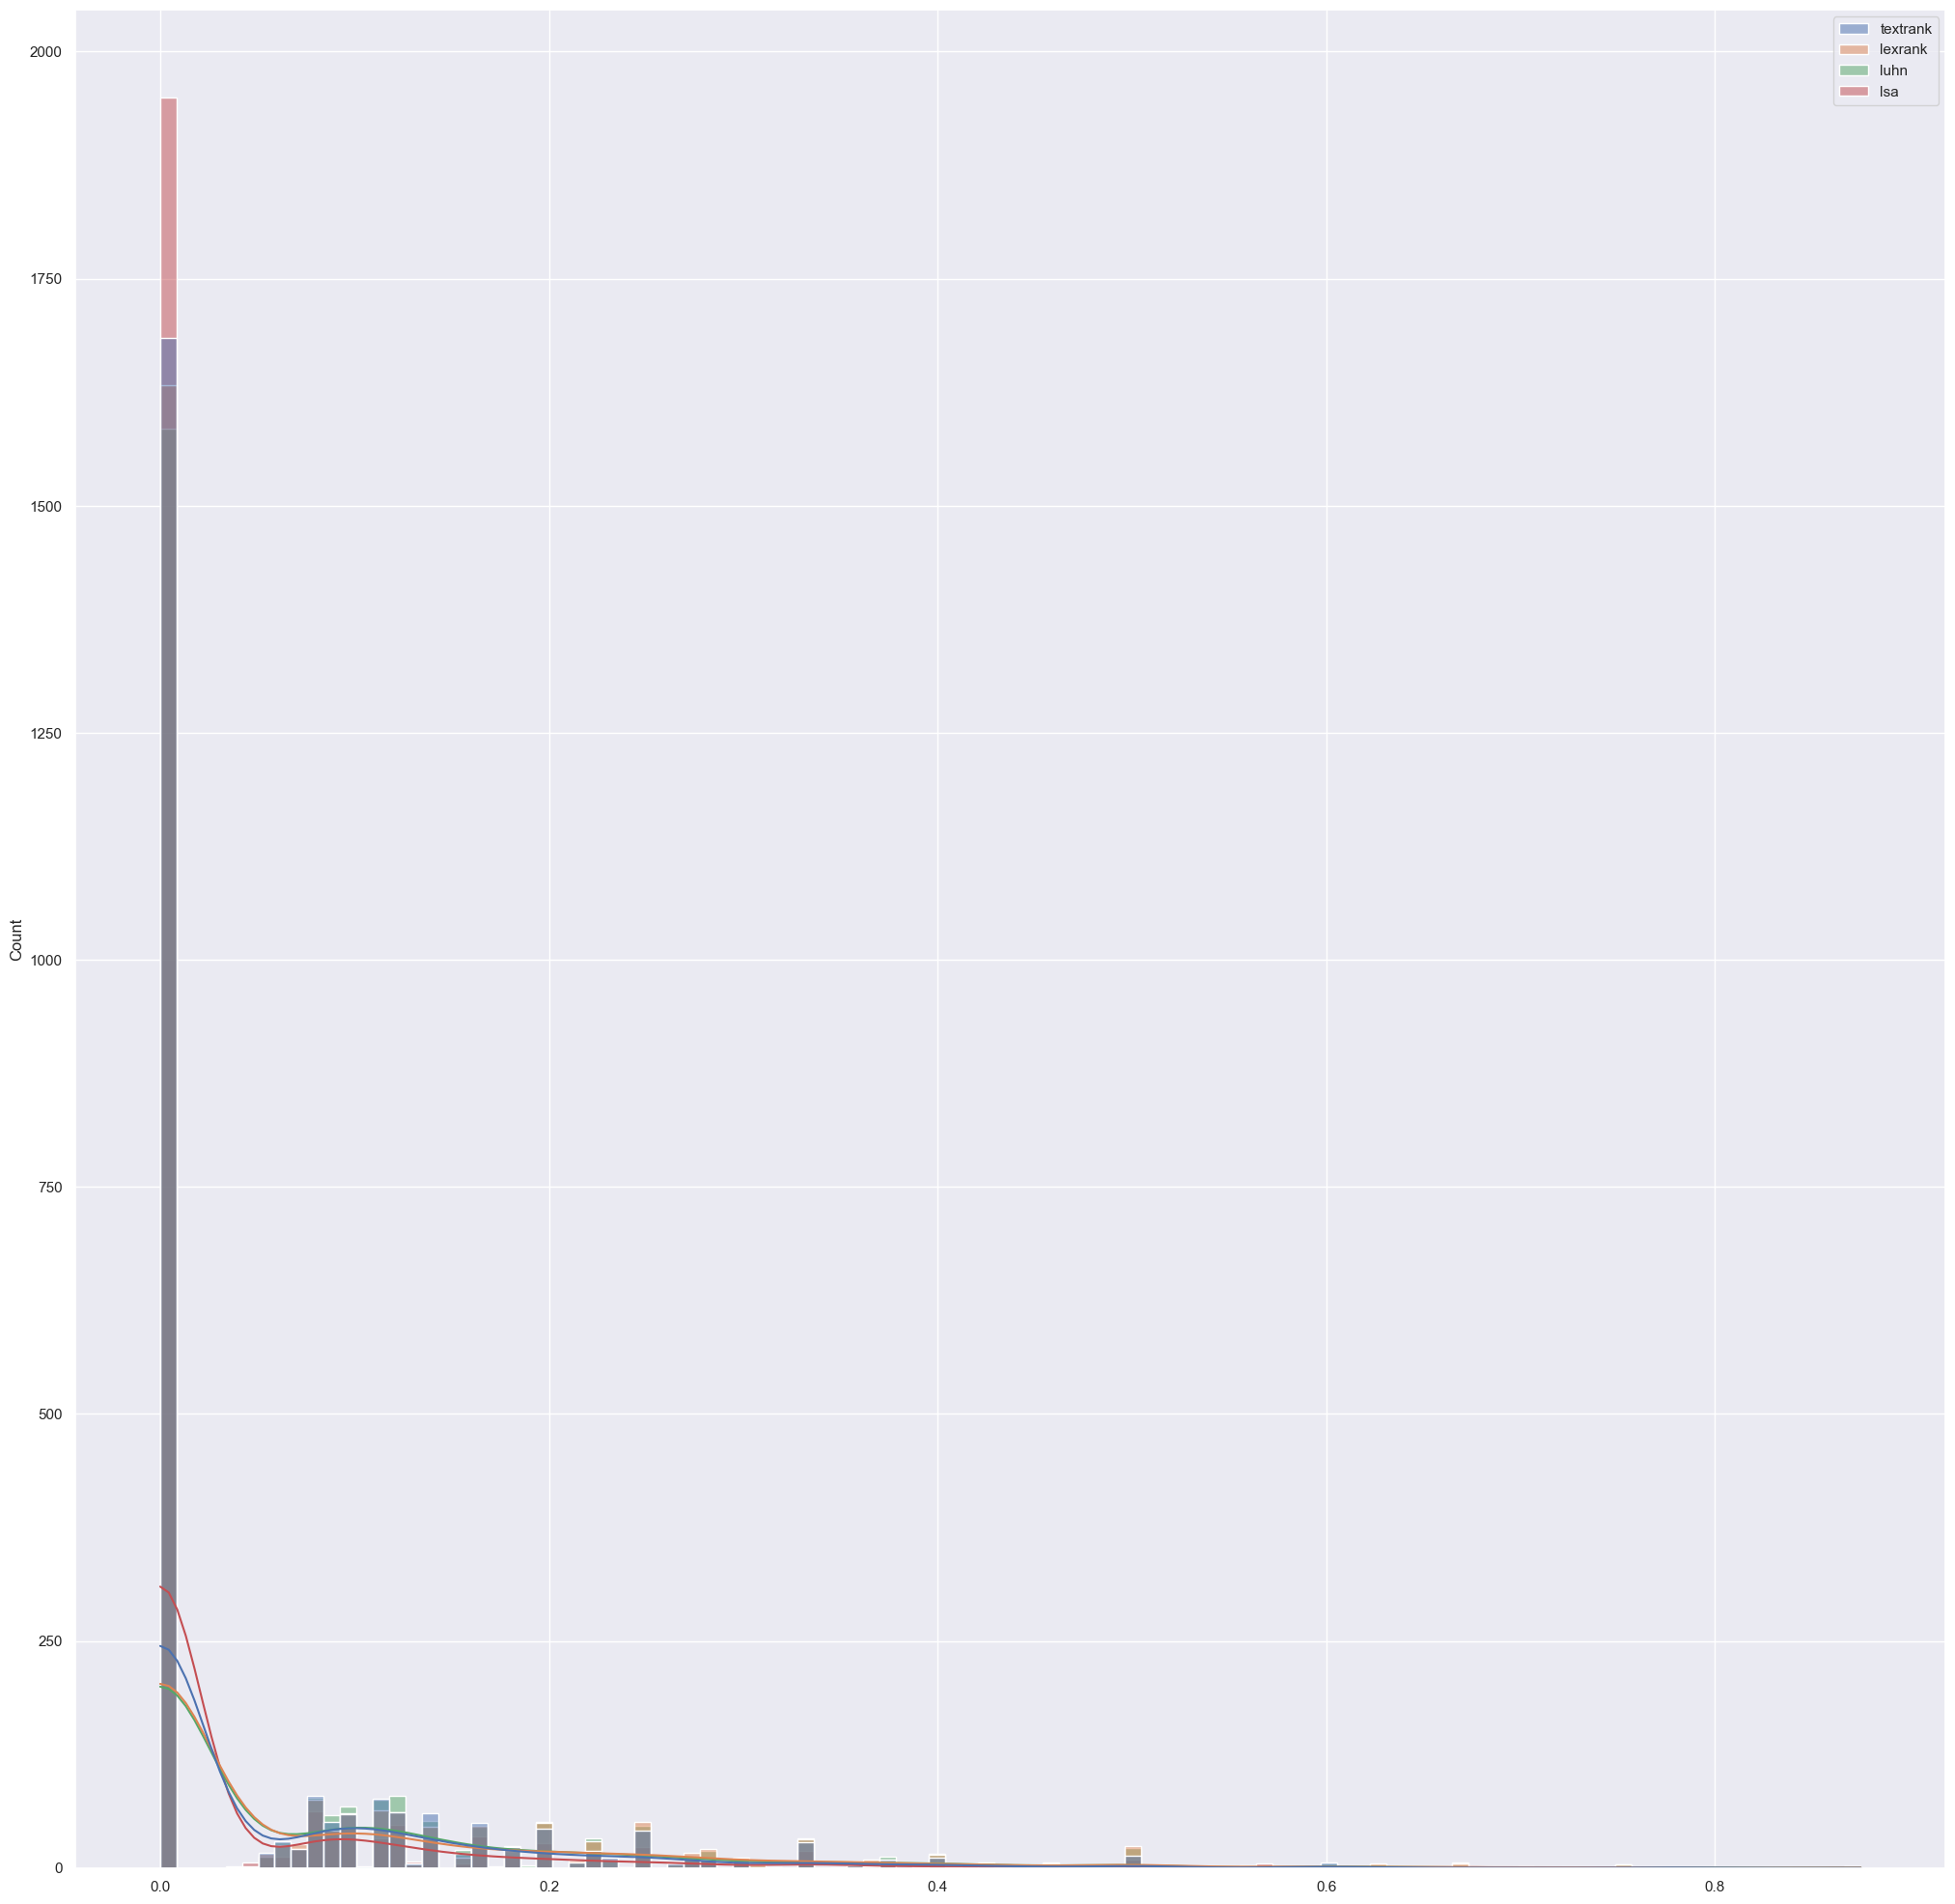

In [346]:
df_precision_rouge2 = pd.DataFrame.from_dict(
    data=dict(textrank=precision_list[0][1], lexrank=precision_list[1][1], luhn=precision_list[2][1], lsa=precision_list[3][1]),
    orient='index'
).T
df_precision_rouge2_sample = df_precision_rouge2.sample(2500)
print(df_precision_rouge2_sample.describe())
ax = sns.histplot(data=df_precision_rouge2_sample, kde=True)

          textrank      lexrank         luhn          lsa
count  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.247170     0.238801     0.264812     0.175663
std       0.159885     0.183319     0.178969     0.154187
min       0.000000     0.000000     0.000000     0.000000
25%       0.133333     0.111111     0.142857     0.083333
50%       0.222222     0.200000     0.230769     0.142857
75%       0.333333     0.333333     0.357143     0.250000
max       1.000000     1.000000     1.000000     1.000000


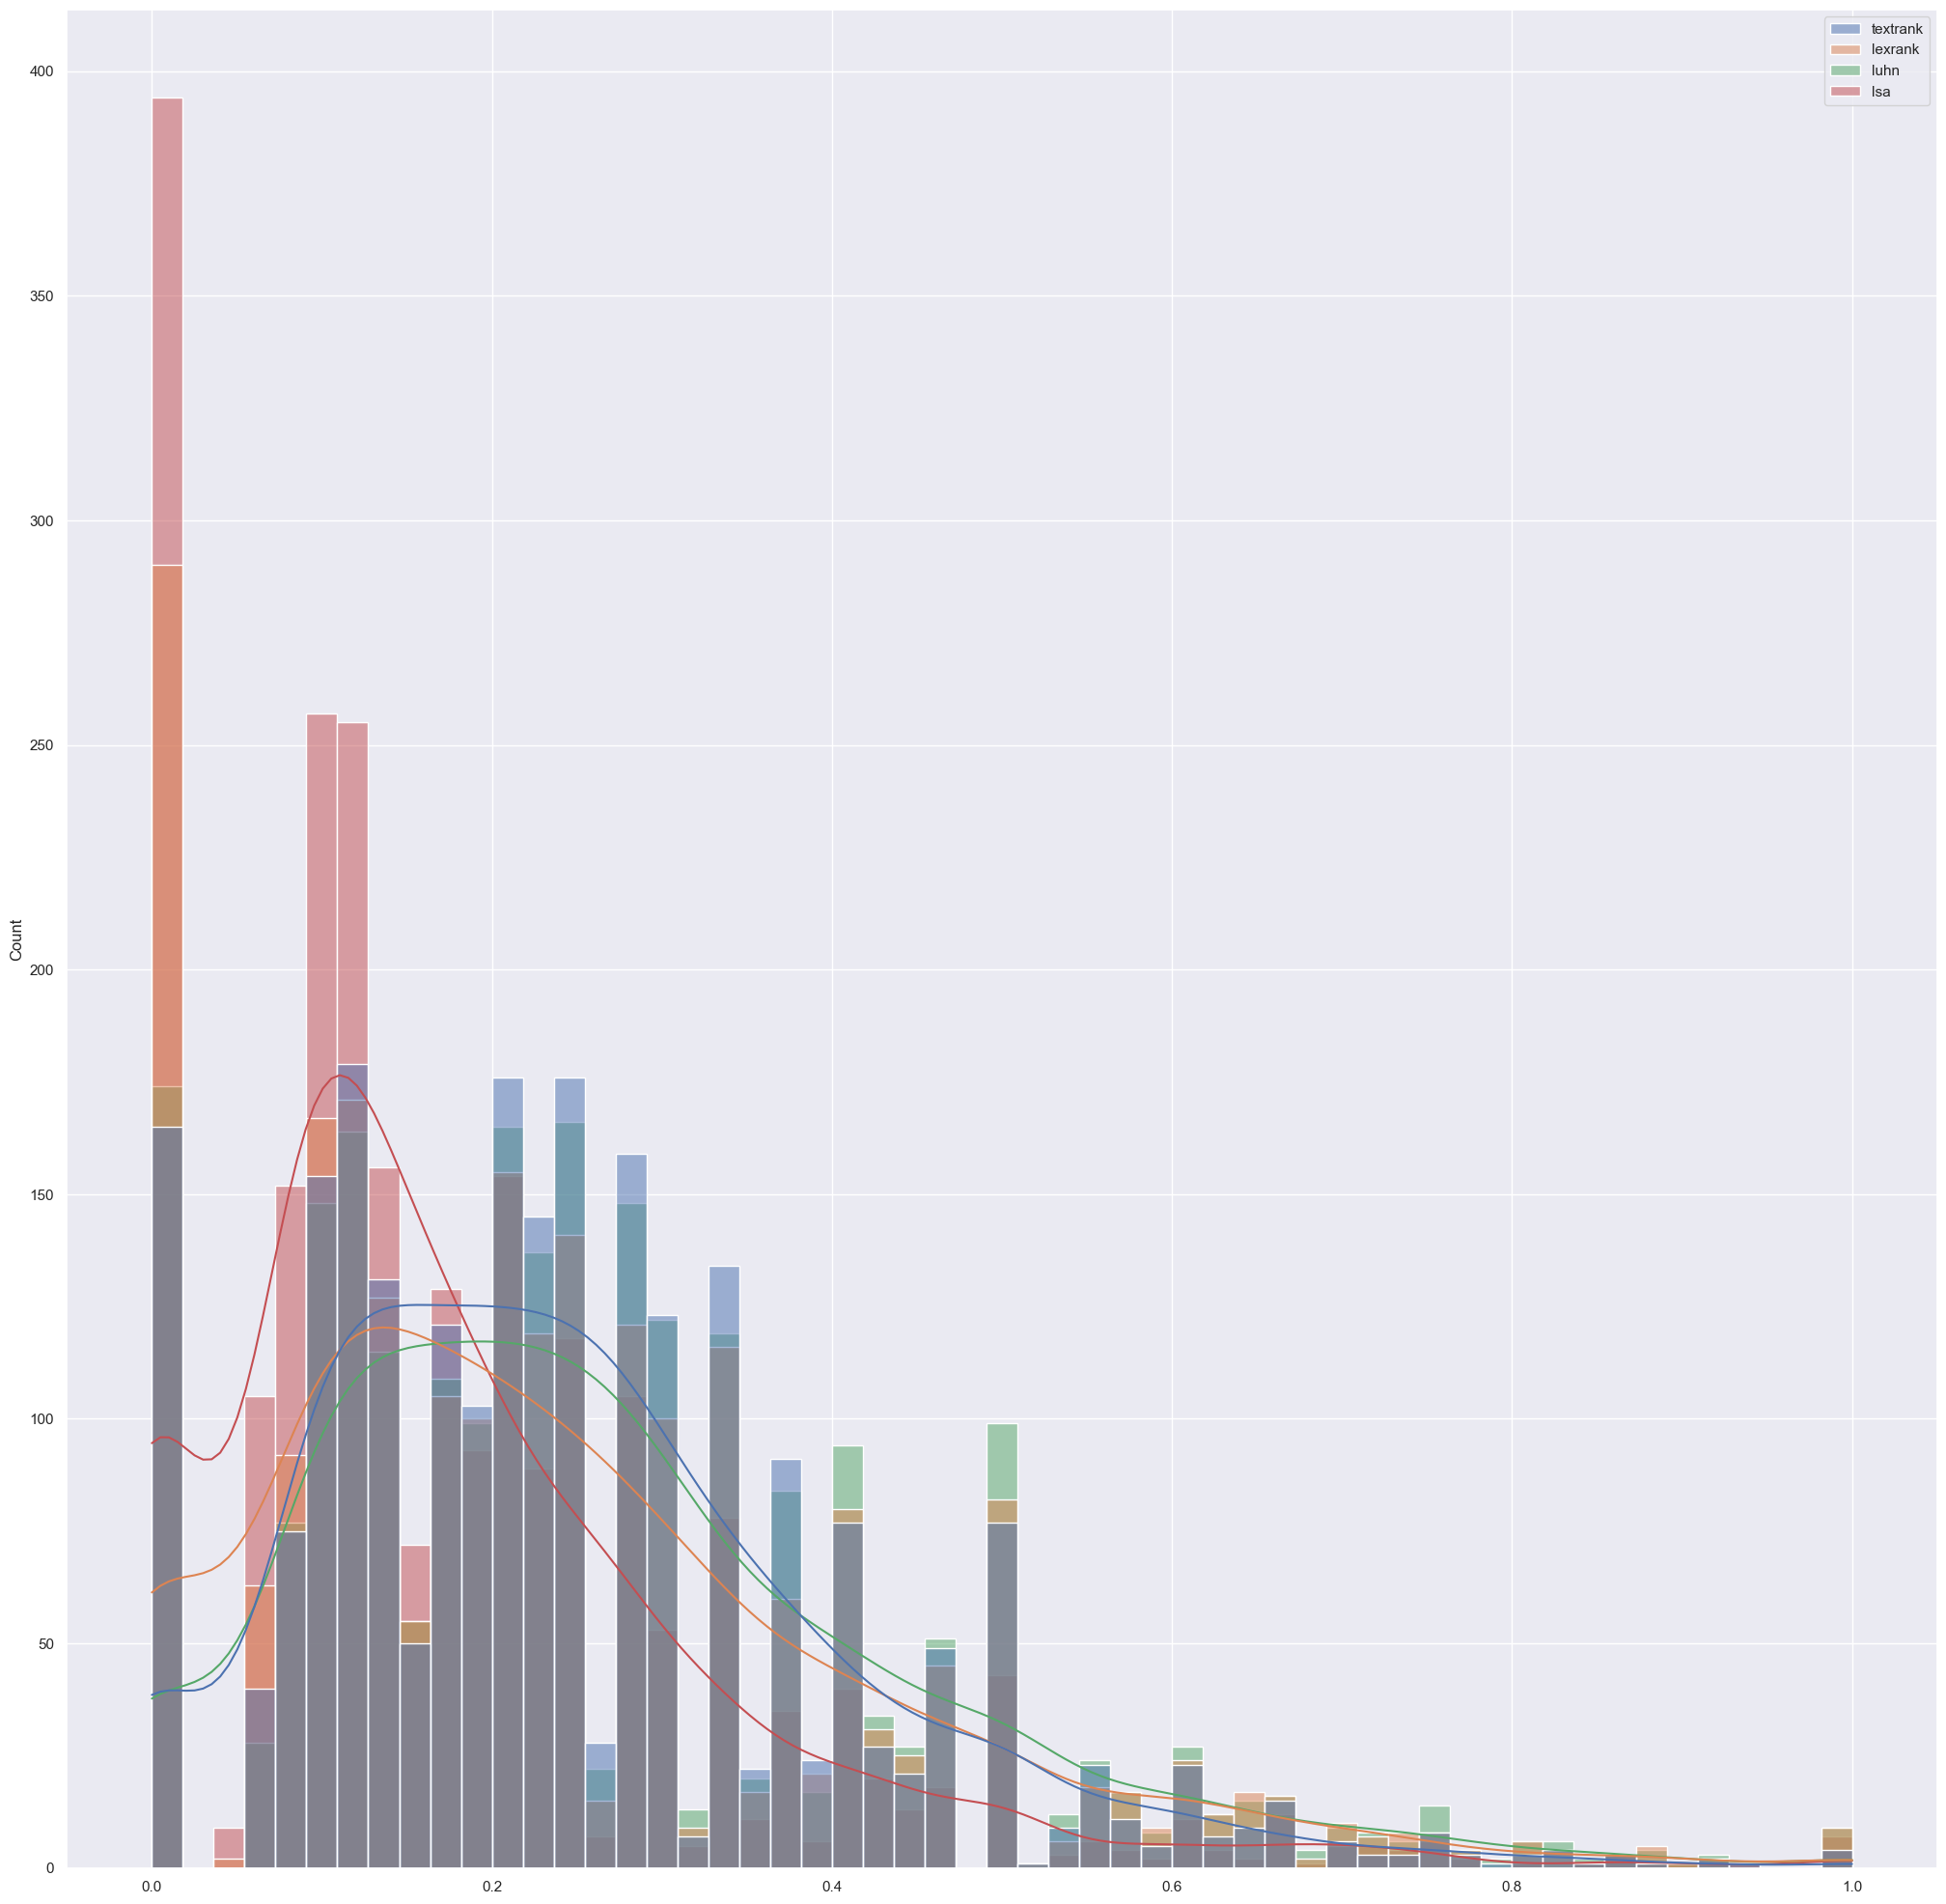

In [347]:
df_precision_rougeL = pd.DataFrame.from_dict(
    data=dict(textrank=precision_list[0][2], lexrank=precision_list[1][2], luhn=precision_list[2][2], lsa=precision_list[3][2]),
    orient='index'
).T
df_precision_rougeL_sample = df_precision_rougeL.sample(2500)
print(df_precision_rougeL_sample.describe())
ax = sns.histplot(data=df_precision_rougeL_sample, kde=True)

In [334]:
# for each of textrank, lexrank, luhn and lsa: rouge1, rouge2, rougeL, rougeLsum
recall_list = [[[], [], []], [[], [], []], [[], [], []], [[], [], []]]
for i in range(len(summary_score_list[0])):
    recall_list[0][0].append(summary_score_df[0].at[i, 'rouge1'][1])  # textrank rouge1
    recall_list[0][1].append(summary_score_df[0].at[i, 'rouge2'][1])  # textrank rouge2
    recall_list[0][2].append(summary_score_df[0].at[i, 'rougeL'][1])  # textrank rougeL

    recall_list[1][0].append(summary_score_df[1].at[i, 'rouge1'][1])  # lexrank rouge1
    recall_list[1][1].append(summary_score_df[1].at[i, 'rouge2'][1])  # lexrank rouge2
    recall_list[1][2].append(summary_score_df[1].at[i, 'rougeL'][1])  # lexrank rougeL

    recall_list[2][0].append(summary_score_df[2].at[i, 'rouge1'][1])  # luhn rouge1
    recall_list[2][1].append(summary_score_df[2].at[i, 'rouge2'][1])  # luhn rouge2
    recall_list[2][2].append(summary_score_df[2].at[i, 'rougeL'][1])  # luhn rougeL

    recall_list[3][0].append(summary_score_df[3].at[i, 'rouge1'][1])  # lsa rouge1
    recall_list[3][1].append(summary_score_df[3].at[i, 'rouge2'][1])  # lsa rouge2
    recall_list[3][2].append(summary_score_df[3].at[i, 'rougeL'][1])  # lsa rougeL

          textrank      lexrank         luhn          lsa
count  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.303331     0.293517     0.324611     0.221749
std       0.197667     0.221853     0.213332     0.187503
min       0.000000     0.000000     0.000000     0.000000
25%       0.166667     0.125000     0.166667     0.100000
50%       0.281746     0.250000     0.300000     0.187500
75%       0.416667     0.428571     0.444444     0.300000
max       1.000000     1.000000     1.000000     1.000000


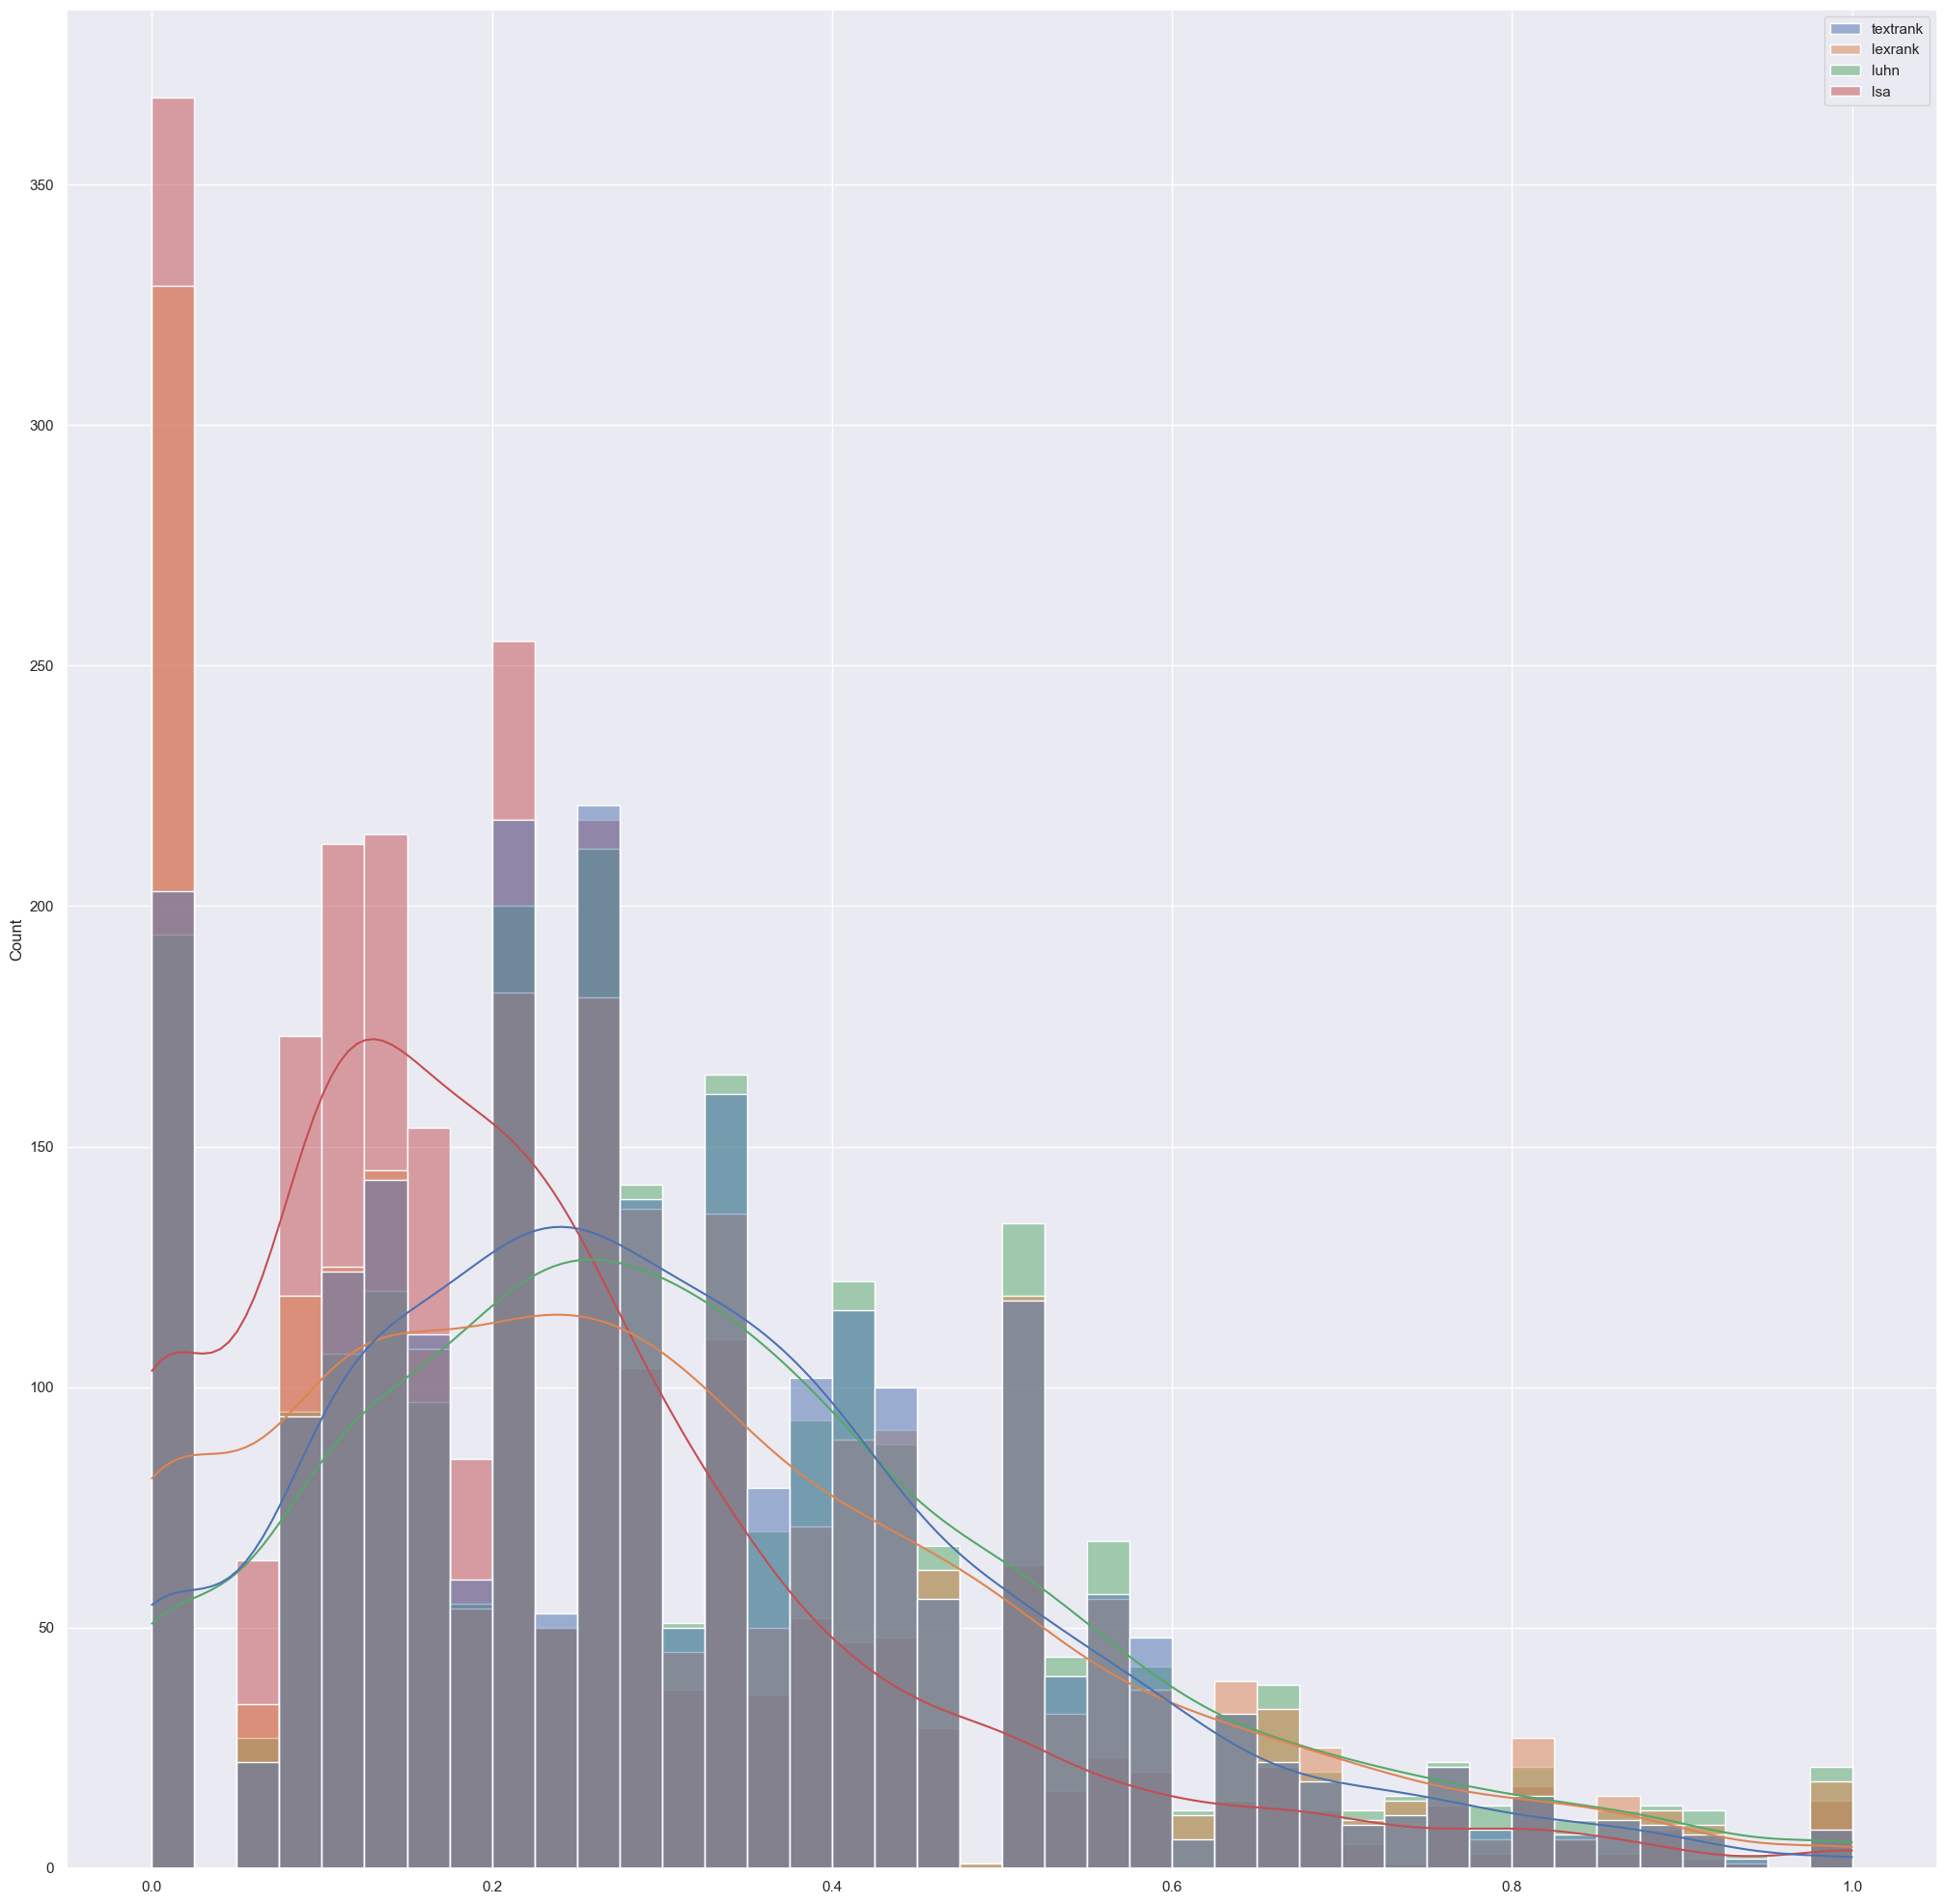

In [348]:
df_recall_rouge1 = pd.DataFrame.from_dict(
    data=dict(textrank=precision_list[0][0], lexrank=precision_list[1][0], luhn=precision_list[2][0], lsa=precision_list[3][0]),
    orient='index'
).T
df_recall_rouge1_sample = df_recall_rouge1.sample(2500)
print(df_recall_rouge1_sample.describe())
ax = sns.histplot(data=df_recall_rouge1_sample, kde=True)

          textrank      lexrank         luhn          lsa
count  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.059507     0.070570     0.072189     0.039953
std       0.115449     0.134404     0.130883     0.101697
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000
75%       0.090909     0.100000     0.111111     0.000000
max       0.785714     1.000000     1.000000     1.000000


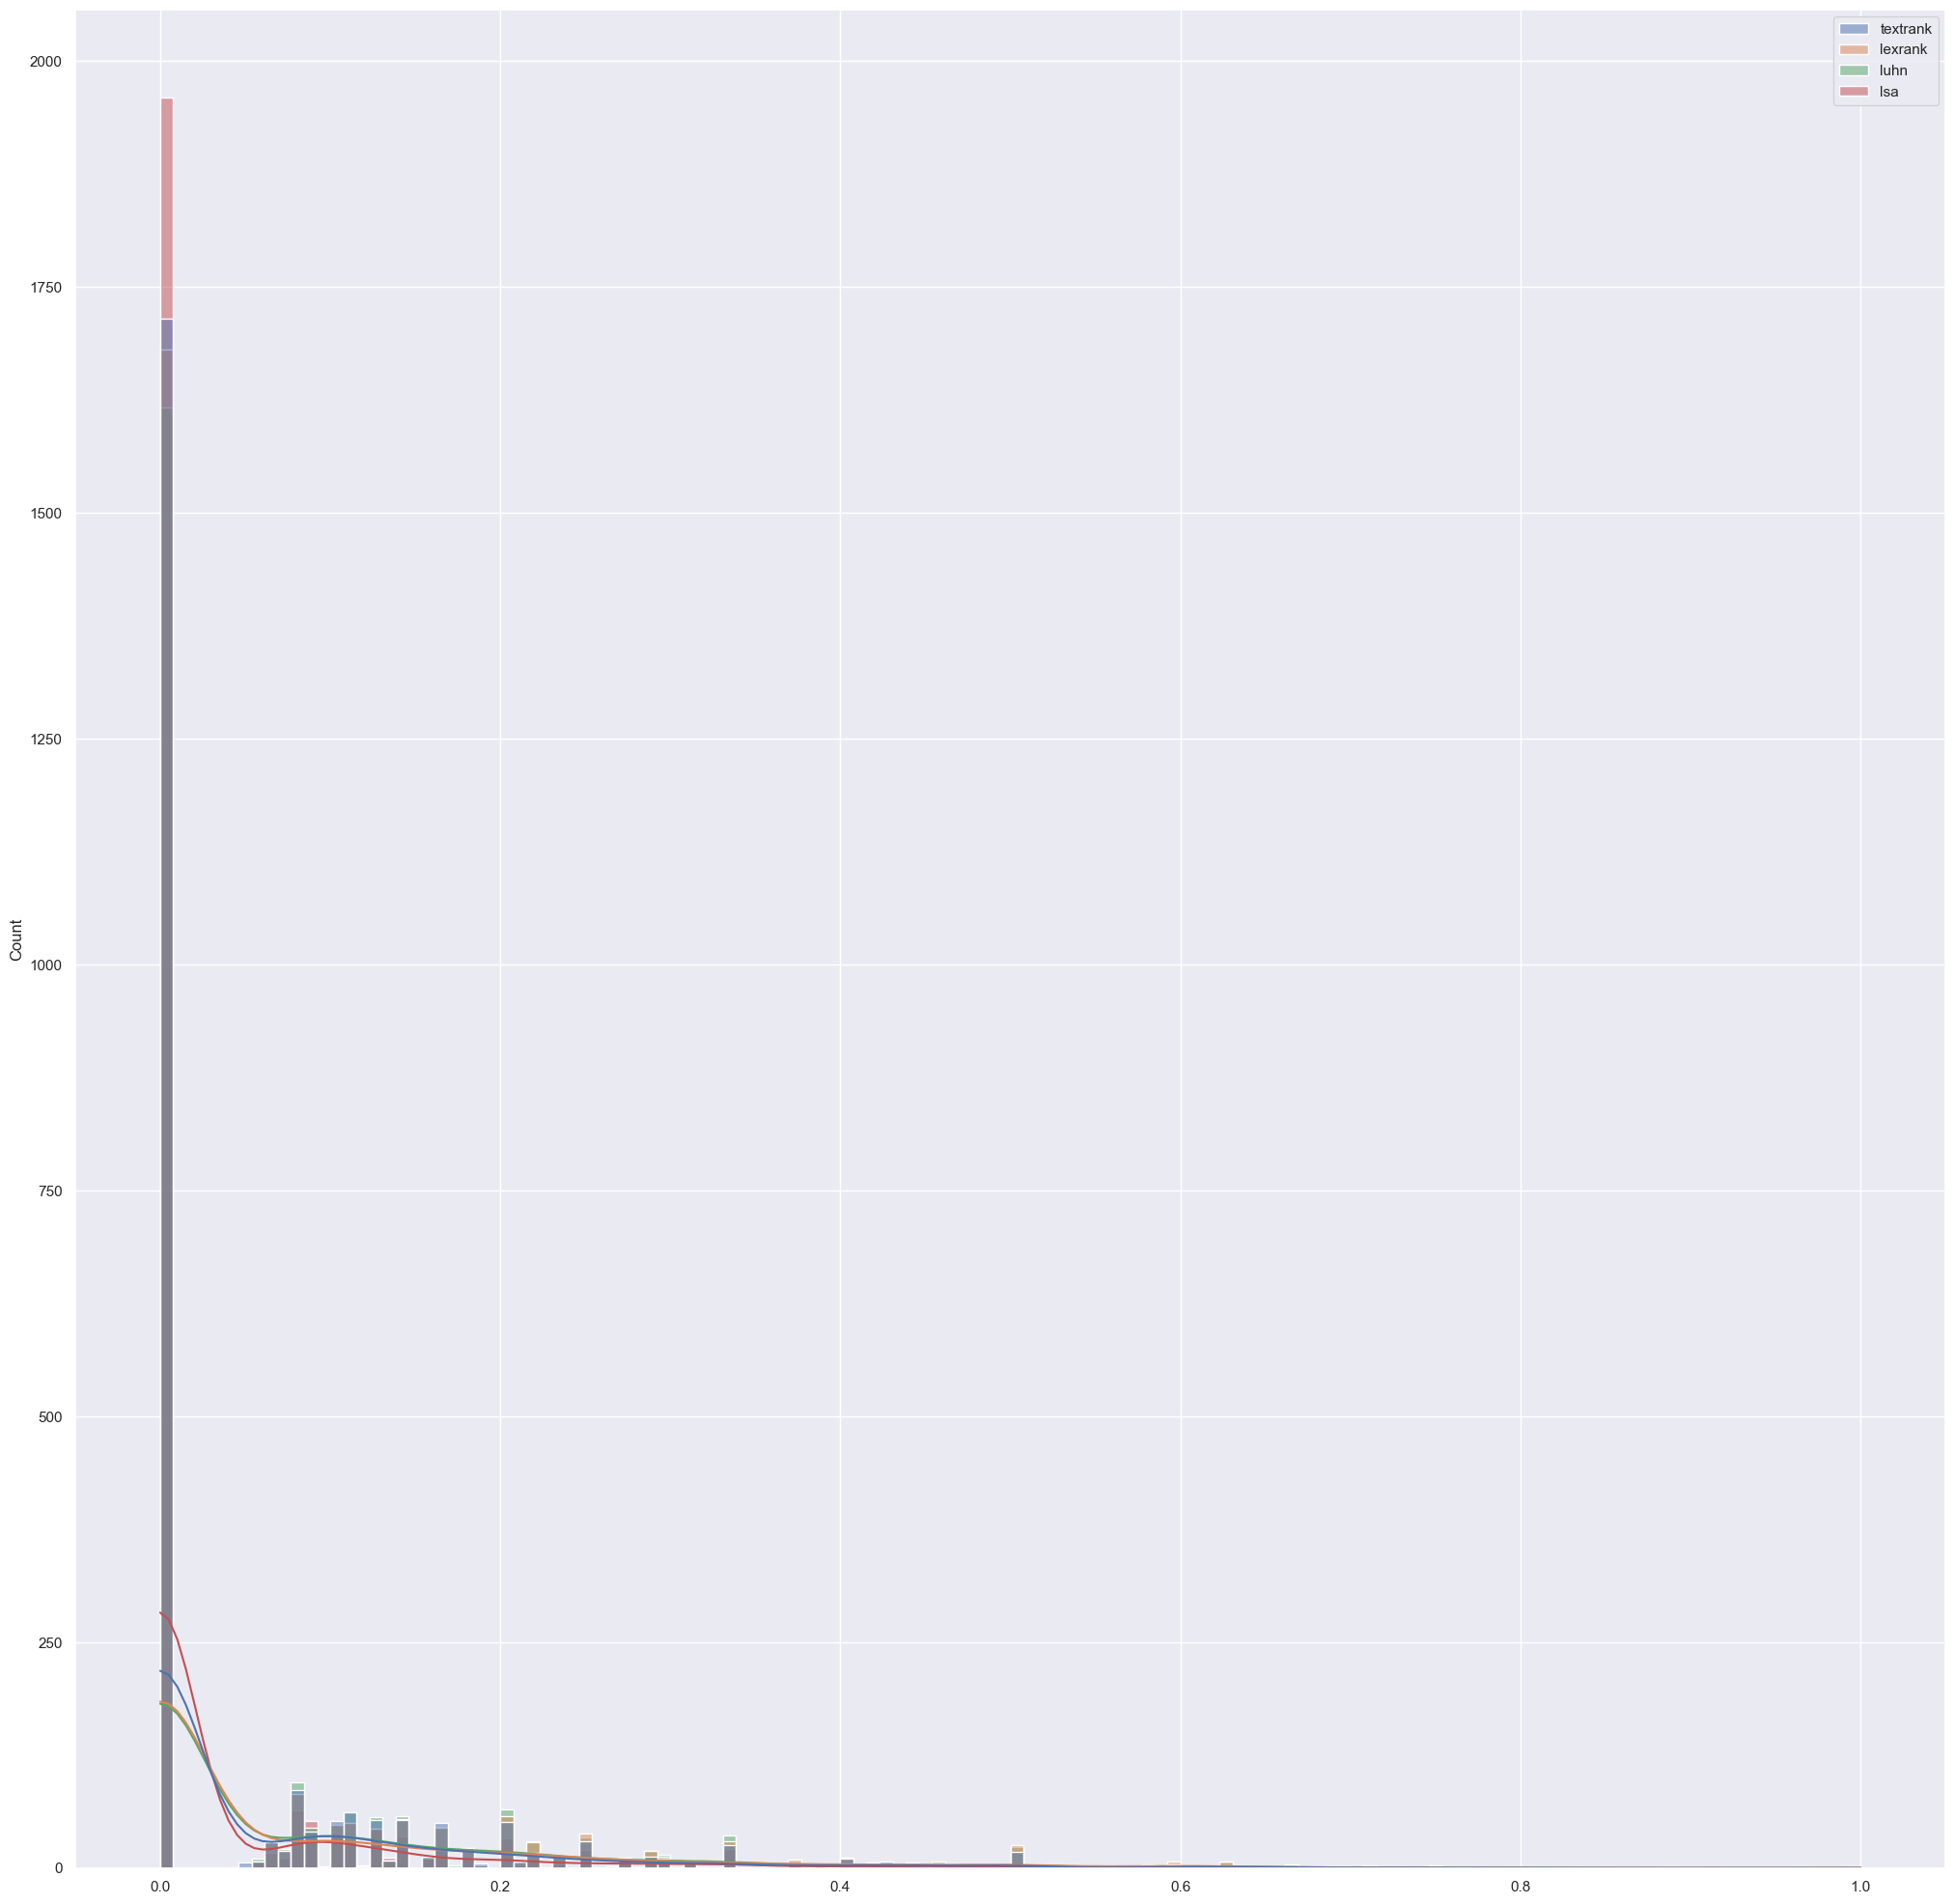

In [349]:
df_recall_rouge2 = pd.DataFrame.from_dict(
    data=dict(textrank=precision_list[0][1], lexrank=precision_list[1][1], luhn=precision_list[2][1], lsa=precision_list[3][1]),
    orient='index'
).T
df_recall_rouge2_sample = df_recall_rouge2.sample(2500)
print(df_recall_rouge2_sample.describe())
ax = sns.histplot(data=df_recall_rouge2_sample, kde=True)

          textrank      lexrank         luhn          lsa
count  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.250554     0.248420     0.266834     0.175531
std       0.167629     0.194089     0.181436     0.159958
min       0.000000     0.000000     0.000000     0.000000
25%       0.133333     0.111111     0.142857     0.083333
50%       0.222222     0.200000     0.230769     0.142857
75%       0.333333     0.333333     0.363636     0.230769
max       1.000000     1.000000     1.000000     1.000000


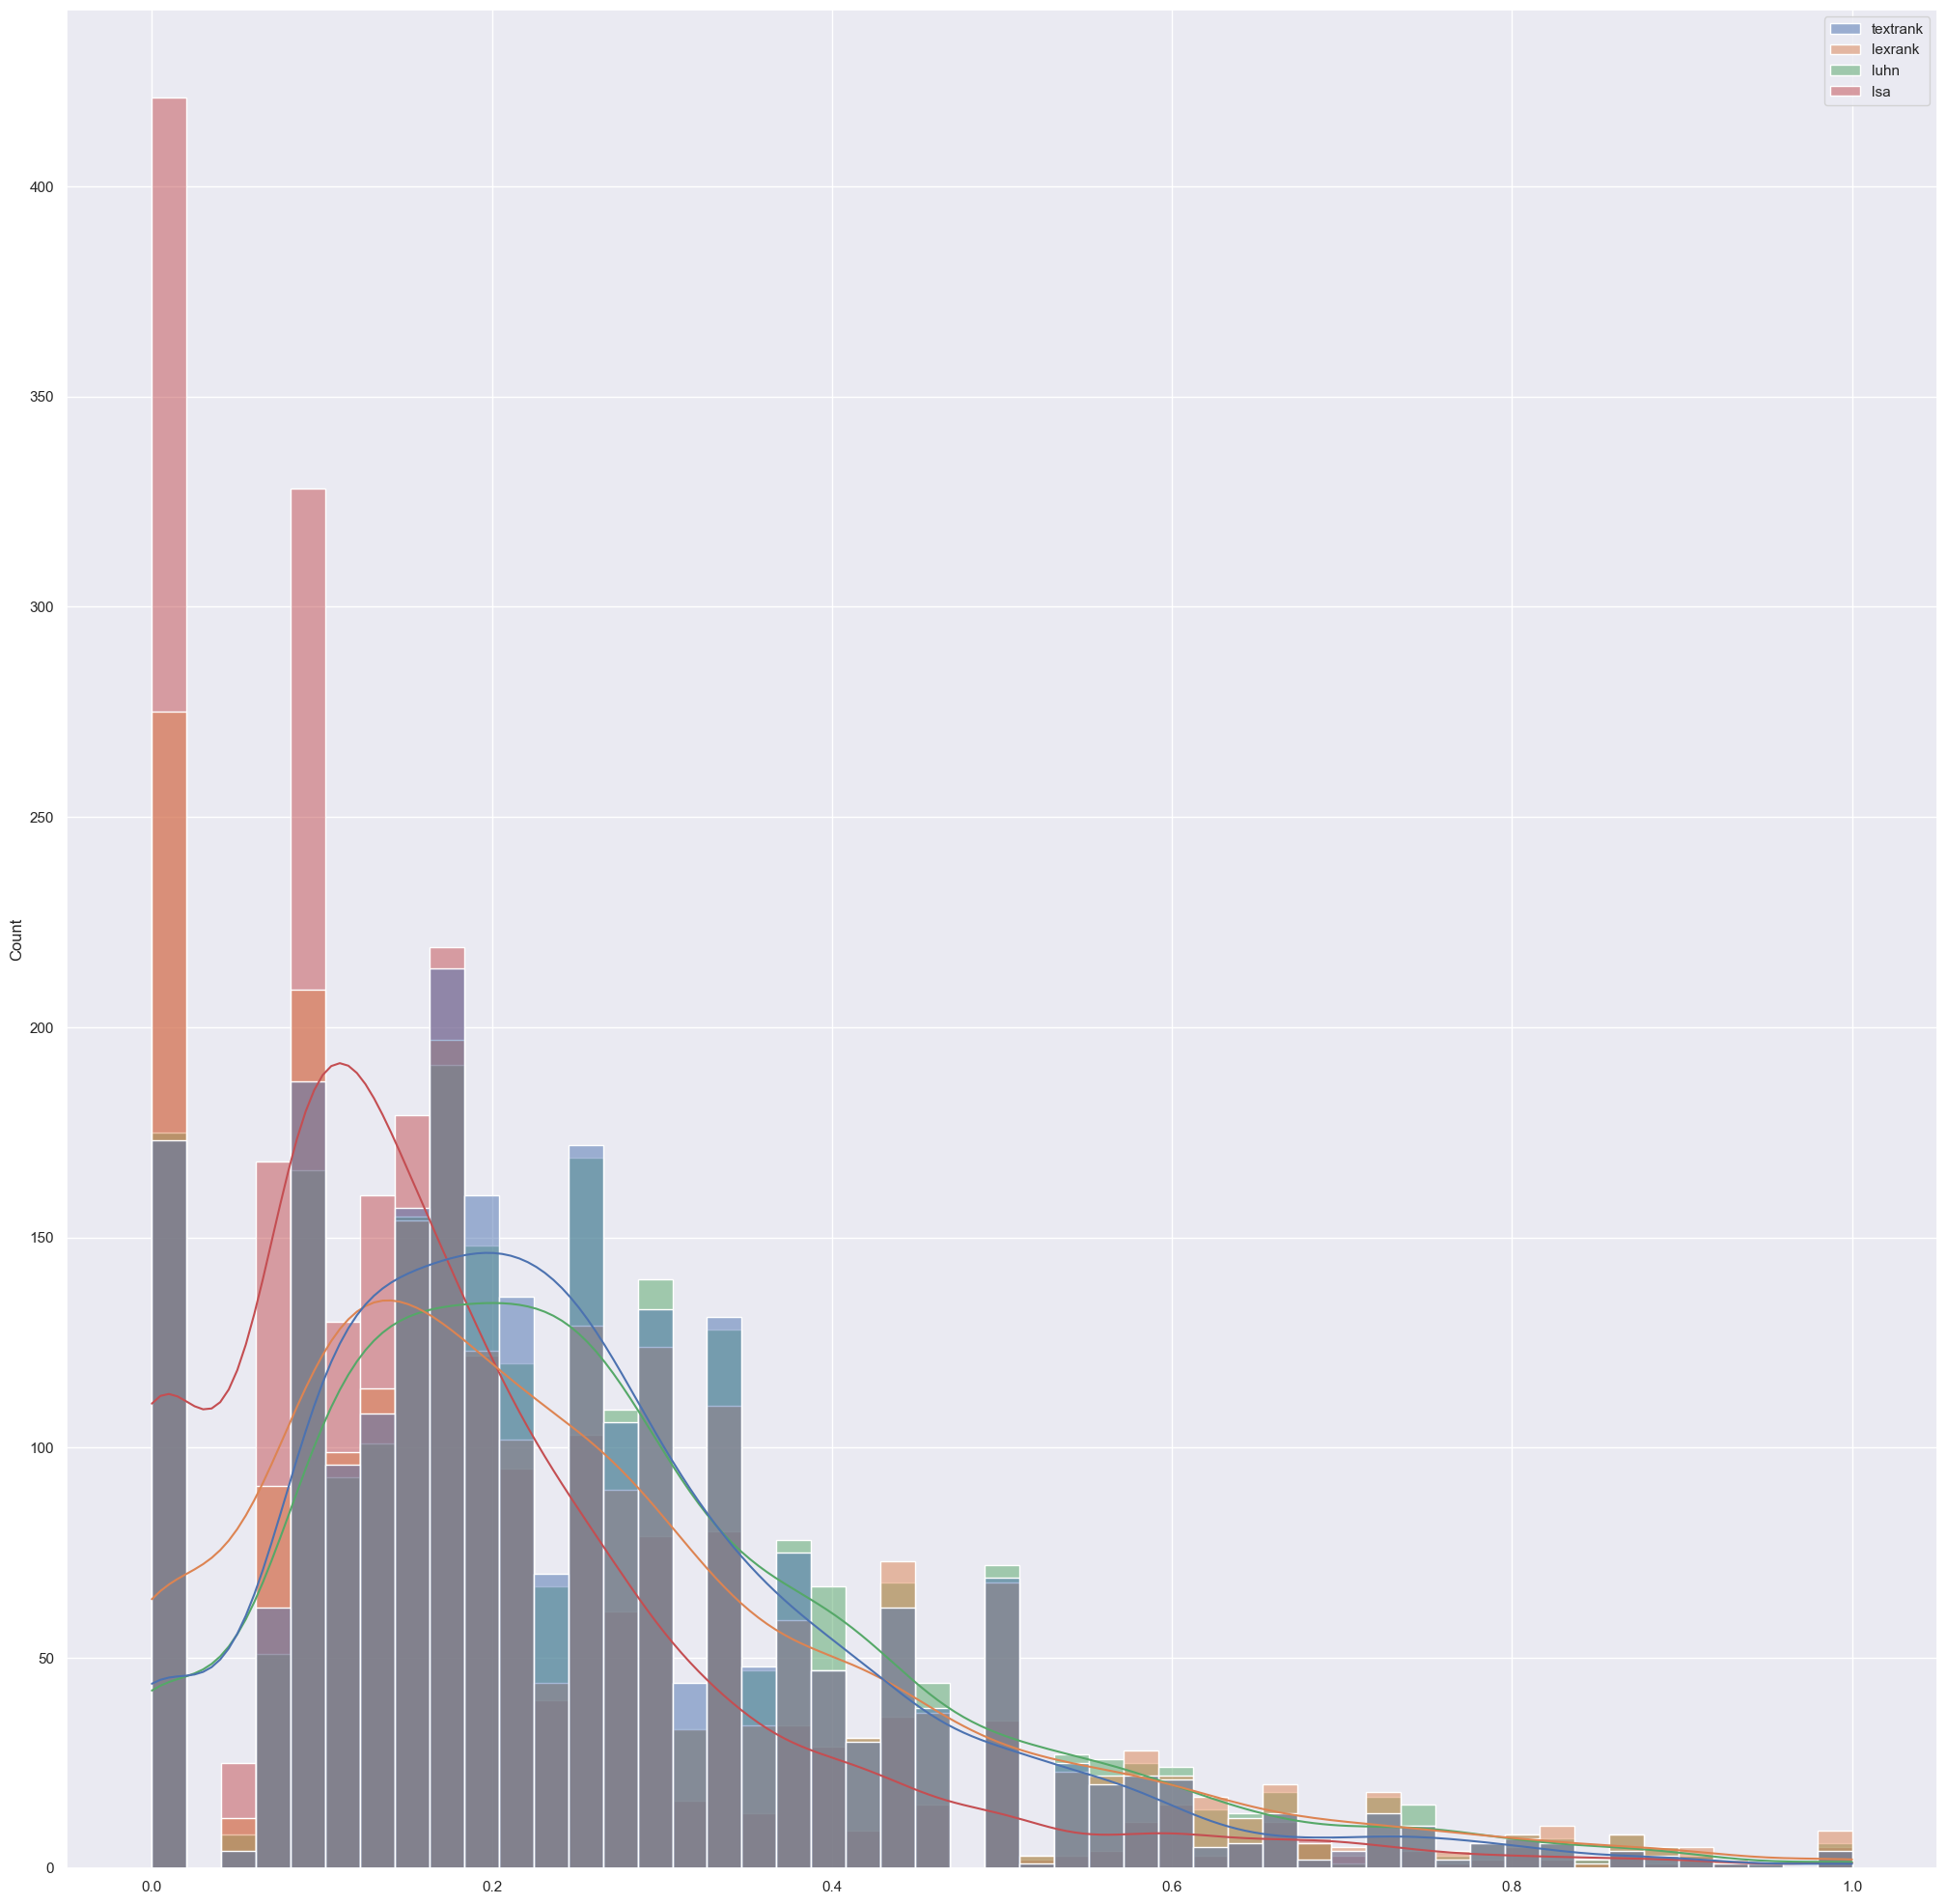

In [350]:
df_recall_rougeL = pd.DataFrame.from_dict(
    data=dict(textrank=precision_list[0][2], lexrank=precision_list[1][2], luhn=precision_list[2][2], lsa=precision_list[3][2]),
    orient='index'
).T
df_recall_rougeL_sample = df_recall_rougeL.sample(2500)
print(df_recall_rougeL_sample.describe())
ax = sns.histplot(data=df_recall_rougeL_sample, kde=True)

In [338]:
# for each of textrank, lexrank, luhn and lsa: rouge1, rouge2, rougeL, rougeLsum
fmeasure_list = [[[], [], []], [[], [], []], [[], [], []], [[], [], []]]
for i in range(len(summary_score_list[0])):
    fmeasure_list[0][0].append(summary_score_df[0].at[i, 'rouge1'][2])  # textrank rouge1
    fmeasure_list[0][1].append(summary_score_df[0].at[i, 'rouge2'][2])  # textrank rouge2
    fmeasure_list[0][2].append(summary_score_df[0].at[i, 'rougeL'][2])  # textrank rougeL

    fmeasure_list[1][0].append(summary_score_df[1].at[i, 'rouge1'][2])  # lexrank rouge1
    fmeasure_list[1][1].append(summary_score_df[1].at[i, 'rouge2'][2])  # lexrank rouge2
    fmeasure_list[1][2].append(summary_score_df[1].at[i, 'rougeL'][2])  # lexrank rougeL

    fmeasure_list[2][0].append(summary_score_df[2].at[i, 'rouge1'][2])  # luhn rouge1
    fmeasure_list[2][1].append(summary_score_df[2].at[i, 'rouge2'][2])  # luhn rouge2
    fmeasure_list[2][2].append(summary_score_df[2].at[i, 'rougeL'][2])  # luhn rougeL

    fmeasure_list[3][0].append(summary_score_df[3].at[i, 'rouge1'][2])  # lsa rouge1
    fmeasure_list[3][1].append(summary_score_df[3].at[i, 'rouge2'][2])  # lsa rouge2
    fmeasure_list[3][2].append(summary_score_df[3].at[i, 'rougeL'][2])  # lsa rougeL

          textrank      lexrank         luhn          lsa
count  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.312078     0.301196     0.332559     0.220141
std       0.196200     0.225557     0.209662     0.186253
min       0.000000     0.000000     0.000000     0.000000
25%       0.166667     0.125000     0.181818     0.090909
50%       0.285714     0.266667     0.306020     0.181818
75%       0.428571     0.428571     0.454545     0.300000
max       1.000000     1.000000     1.000000     1.000000


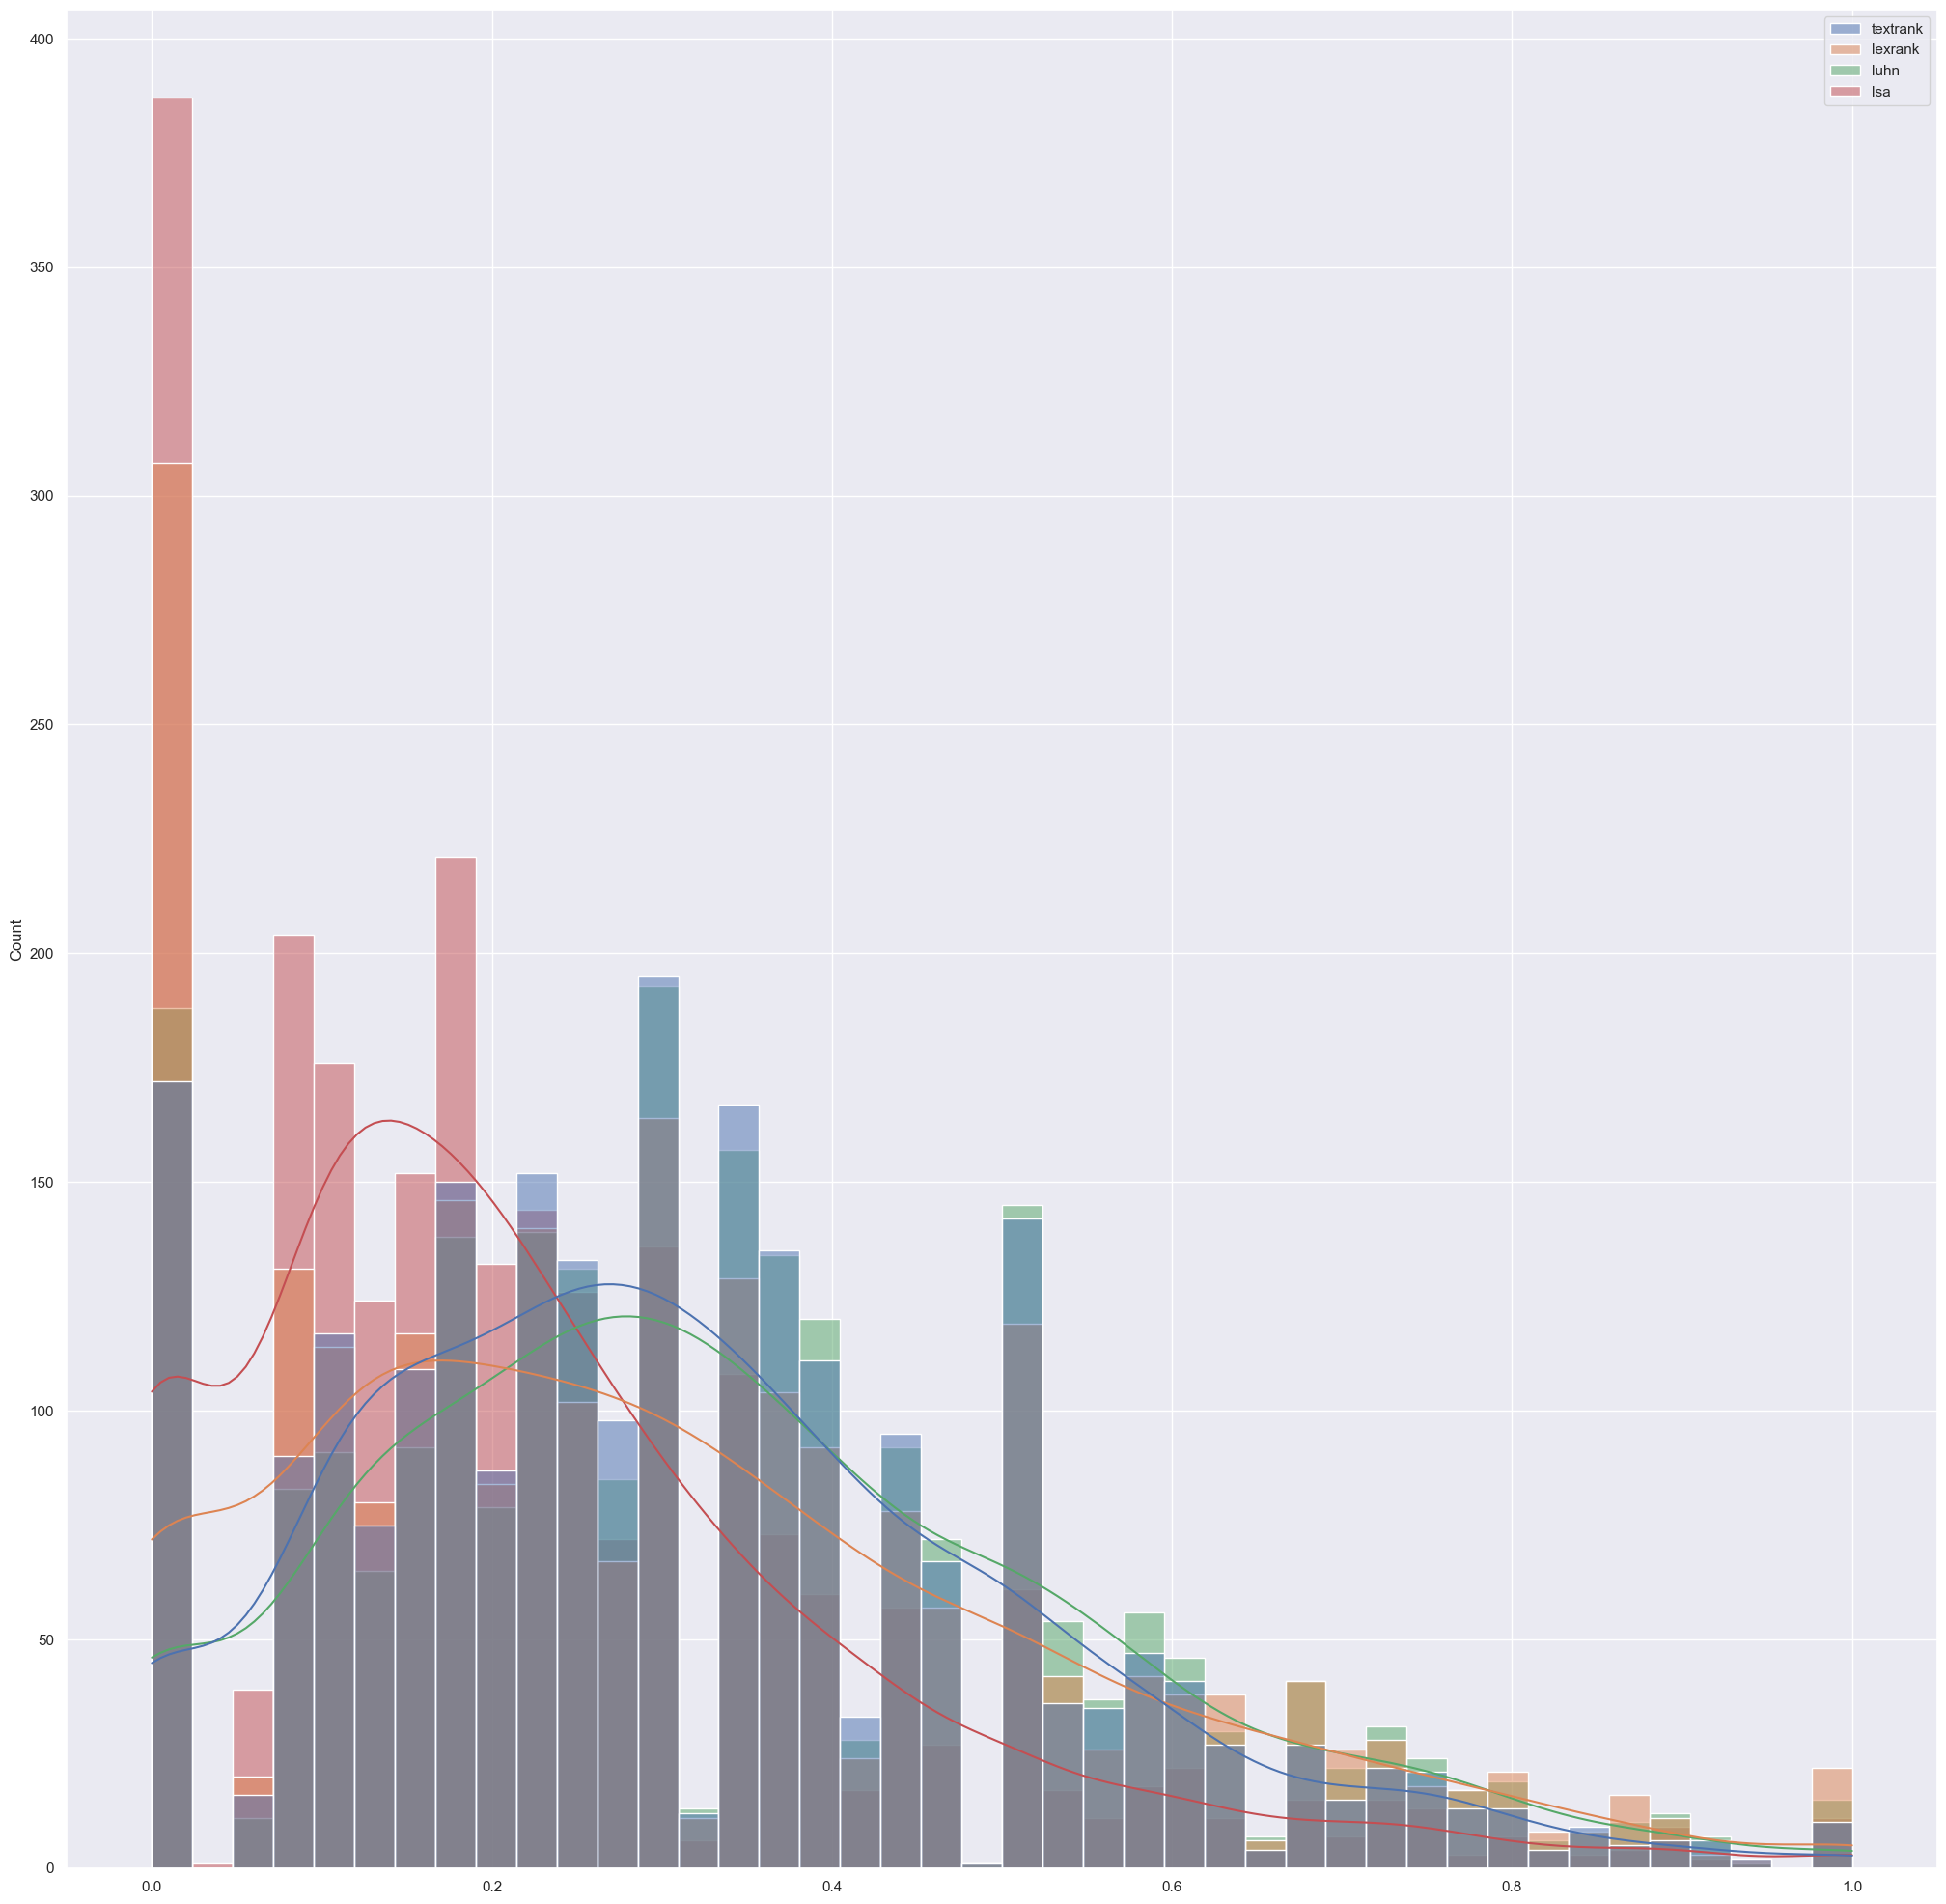

In [351]:
df_fmeasure_rouge1 = pd.DataFrame.from_dict(
    data=dict(textrank=precision_list[0][0], lexrank=precision_list[1][0], luhn=precision_list[2][0], lsa=precision_list[3][0]),
    orient='index'
).T
df_fmeasure_rouge1_sample = df_fmeasure_rouge1.sample(2500)
print(df_fmeasure_rouge1_sample.describe())
ax = sns.histplot(data=df_fmeasure_rouge1_sample, kde=True)

          textrank      lexrank         luhn          lsa
count  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.059562     0.069385     0.071673     0.043794
std       0.117242     0.132586     0.133757     0.112623
min       0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000
75%       0.090909     0.100000     0.101316     0.000000
max       0.875000     1.000000     1.000000     1.000000


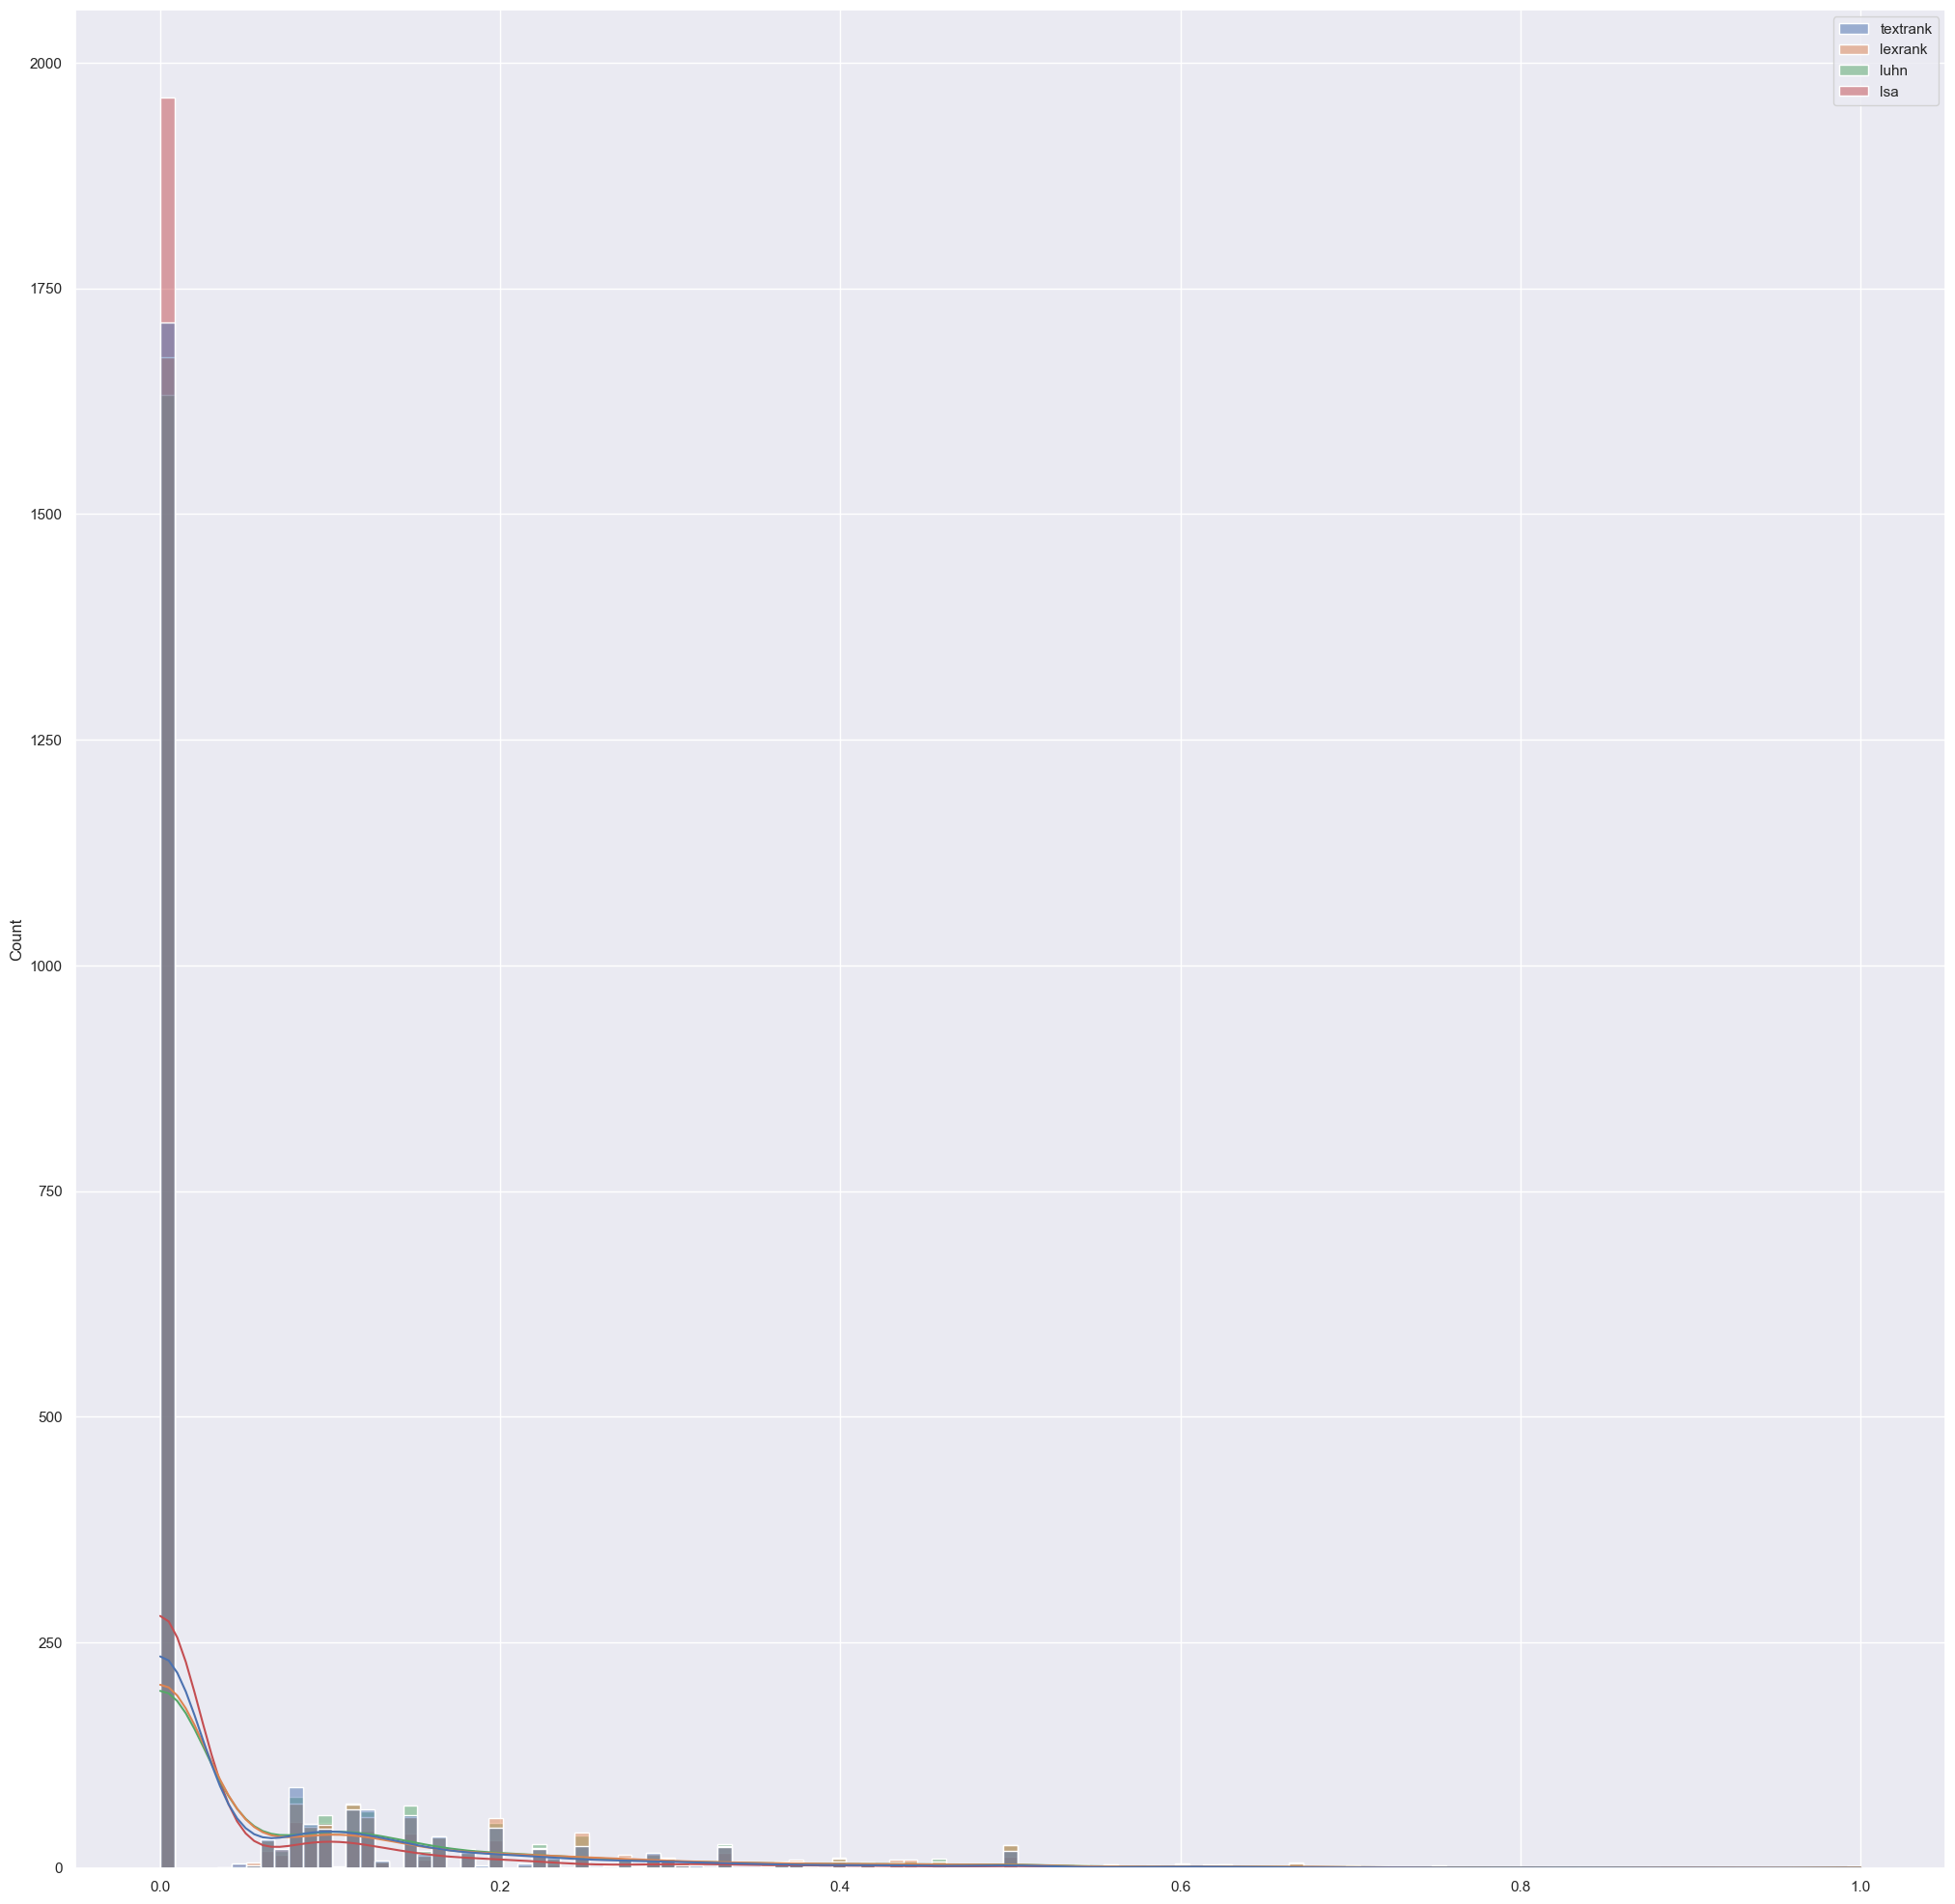

In [352]:
df_fmeasure_rouge2 = pd.DataFrame.from_dict(
    data=dict(textrank=precision_list[0][1], lexrank=precision_list[1][1], luhn=precision_list[2][1], lsa=precision_list[3][1]),
    orient='index'
).T
df_fmeasure_rouge2_sample = df_fmeasure_rouge2.sample(2500)
print(df_fmeasure_rouge2_sample.describe())
ax = sns.histplot(data=df_fmeasure_rouge2_sample, kde=True)

          textrank      lexrank         luhn          lsa
count  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.244189     0.245210     0.260344     0.175813
std       0.158575     0.186971     0.173642     0.154526
min       0.000000     0.000000     0.000000     0.000000
25%       0.140476     0.111111     0.142857     0.083333
50%       0.222222     0.214286     0.230769     0.142857
75%       0.333333     0.333333     0.333333     0.230769
max       1.000000     1.000000     1.000000     1.000000


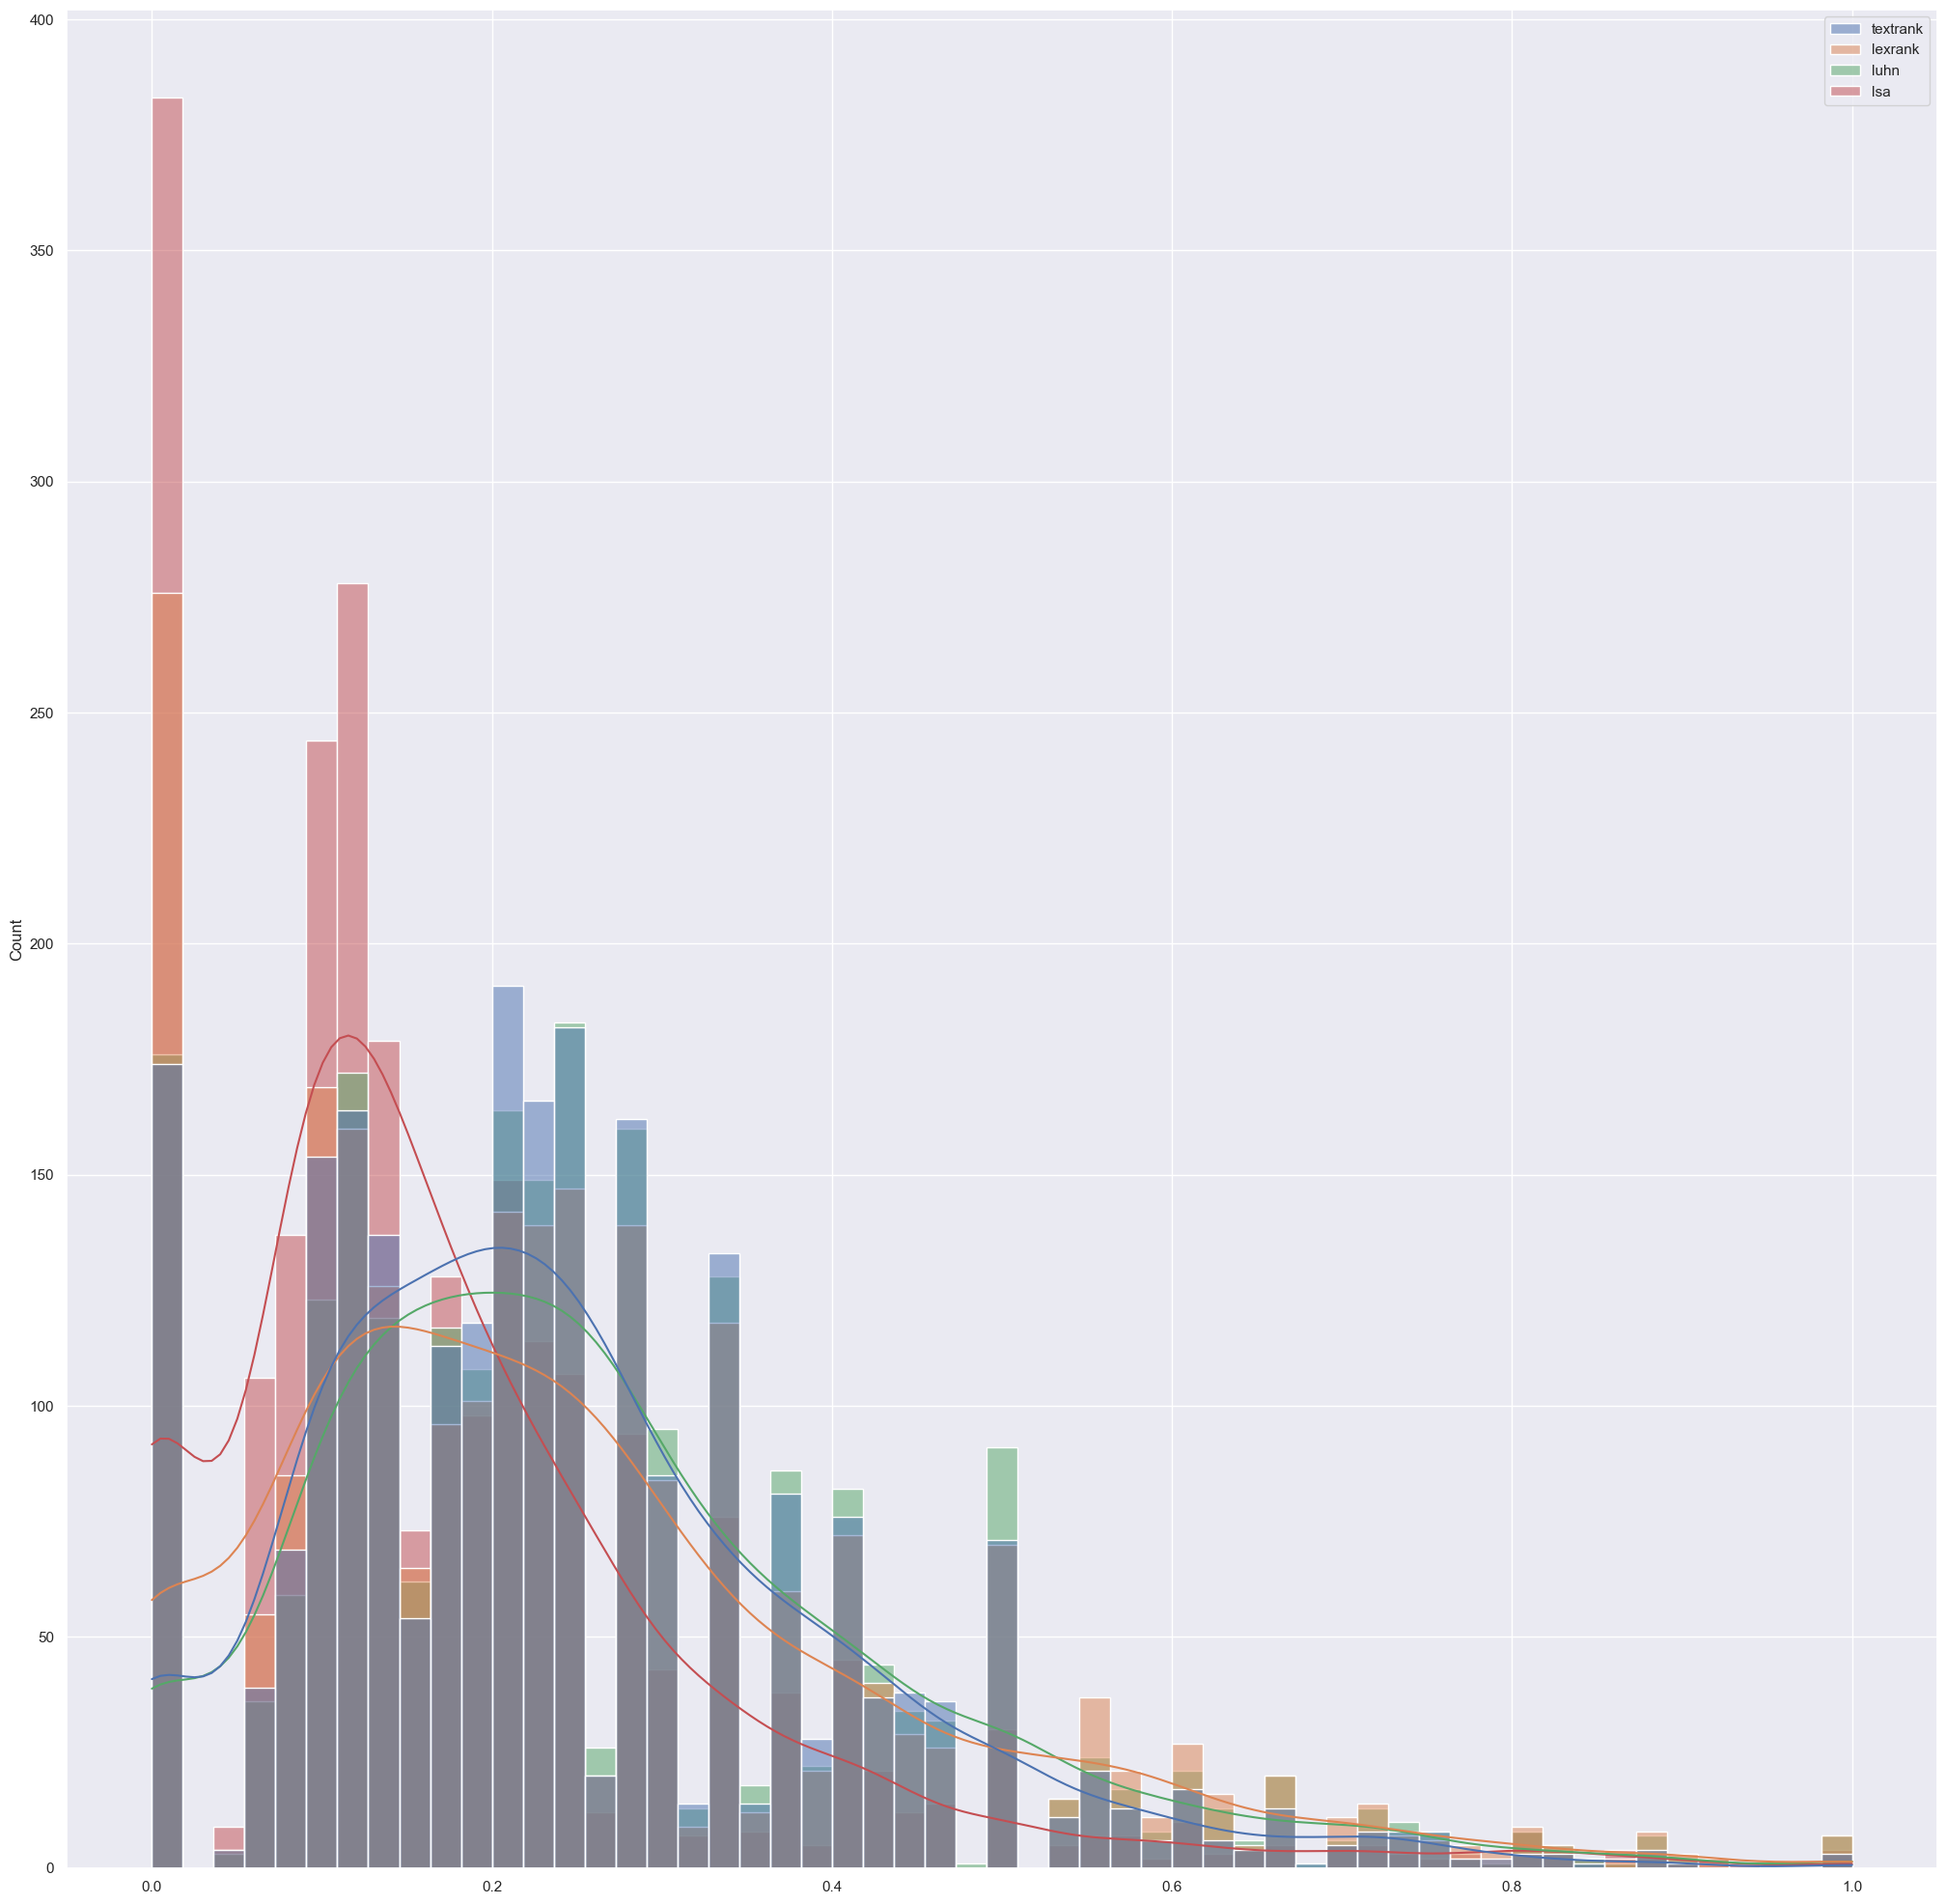

In [354]:
df_fmeasure_rougeL = pd.DataFrame.from_dict(
    data=dict(textrank=precision_list[0][2], lexrank=precision_list[1][2], luhn=precision_list[2][2], lsa=precision_list[3][2]),
    orient='index'
).T
df_fmeasure_rougeL_sample = df_fmeasure_rougeL.sample(2500)
print(df_fmeasure_rougeL_sample.describe())
ax = sns.histplot(data=df_fmeasure_rougeL_sample, kde=True)

In [356]:
summary_score_df[0].head()

,rouge1,rouge2,rougeL
0,"(0.8181818181818182, 0.2, 0.32142857142857145)","(0.1, 0.022727272727272728, 0.037037037037037035)","(0.6363636363636364, 0.15555555555555556, 0.25)"
1,"(0.375, 0.04411764705882353, 0.07894736842105263)","(0.0, 0.0, 0.0)","(0.375, 0.04411764705882353, 0.07894736842105263)"
2,"(0.2777777777777778, 0.19230769230769232, 0.22...","(0.0, 0.0, 0.0)","(0.1111111111111111, 0.07692307692307693, 0.09..."
3,"(0.46153846153846156, 0.17647058823529413, 0.2...","(0.25, 0.09090909090909091, 0.13333333333333333)","(0.46153846153846156, 0.17647058823529413, 0.2..."
4,"(0.2, 0.08695652173913043, 0.12121212121212122)","(0.0, 0.0, 0.0)","(0.1, 0.043478260869565216, 0.06060606060606061)"


In [357]:
summary_score_df[1].head()

,rouge1,rouge2,rougeL
0,"(0.8181818181818182, 0.2, 0.32142857142857145)","(0.1, 0.022727272727272728, 0.037037037037037035)","(0.6363636363636364, 0.15555555555555556, 0.25)"
1,"(0.25, 0.0392156862745098, 0.06779661016949153)","(0.0, 0.0, 0.0)","(0.25, 0.0392156862745098, 0.06779661016949153)"
2,"(0.7777777777777778, 0.5833333333333334, 0.666...","(0.47058823529411764, 0.34782608695652173, 0.3...","(0.7222222222222222, 0.5416666666666666, 0.619..."
3,"(0.46153846153846156, 0.17647058823529413, 0.2...","(0.25, 0.09090909090909091, 0.13333333333333333)","(0.46153846153846156, 0.17647058823529413, 0.2..."
4,"(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)"


In [358]:
summary_score_df[2].head()

,rouge1,rouge2,rougeL
0,"(0.8181818181818182, 0.2, 0.32142857142857145)","(0.1, 0.022727272727272728, 0.037037037037037035)","(0.6363636363636364, 0.15555555555555556, 0.25)"
1,"(0.375, 0.04411764705882353, 0.07894736842105263)","(0.0, 0.0, 0.0)","(0.375, 0.04411764705882353, 0.07894736842105263)"
2,"(0.7777777777777778, 0.5833333333333334, 0.666...","(0.47058823529411764, 0.34782608695652173, 0.3...","(0.7222222222222222, 0.5416666666666666, 0.619..."
3,"(0.46153846153846156, 0.17647058823529413, 0.2...","(0.25, 0.09090909090909091, 0.13333333333333333)","(0.46153846153846156, 0.17647058823529413, 0.2..."
4,"(0.3, 0.08108108108108109, 0.12765957446808512)","(0.0, 0.0, 0.0)","(0.2, 0.05405405405405406, 0.0851063829787234)"


In [359]:
summary_score_df[3].head()

,rouge1,rouge2,rougeL
0,"(0.18181818181818182, 0.09090909090909091, 0.1...","(0.0, 0.0, 0.0)","(0.18181818181818182, 0.09090909090909091, 0.1..."
1,"(0.25, 0.08333333333333333, 0.125)","(0.0, 0.0, 0.0)","(0.25, 0.08333333333333333, 0.125)"
2,"(0.05555555555555555, 0.05, 0.052631578947368425)","(0.0, 0.0, 0.0)","(0.05555555555555555, 0.05, 0.052631578947368425)"
3,"(0.5384615384615384, 0.20588235294117646, 0.29...","(0.25, 0.09090909090909091, 0.13333333333333333)","(0.46153846153846156, 0.17647058823529413, 0.2..."
4,"(0.2, 0.09090909090909091, 0.12500000000000003)","(0.0, 0.0, 0.0)","(0.1, 0.045454545454545456, 0.06250000000000001)"


In [360]:
print('textrank: ', textr_sum_copy[0][0])
print('lexrank: ', lexr_sum_copy[0][0])
print('luhn: ', luhn_sum_copy[0][0])
print('lsa: ', lsa_sum_copy[0][0])
print('actual title: ', title_list[0])

textrank:  BALTIMORE  —   A judge on Thursday found the sole officer charged with murder in the death of Freddie Gray not guilty of all counts, leaving prosecutors without a conviction for the third time in the   case that spurred riots and unrest in the city last year.
lexrank:  BALTIMORE  —   A judge on Thursday found the sole officer charged with murder in the death of Freddie Gray not guilty of all counts, leaving prosecutors without a conviction for the third time in the   case that spurred riots and unrest in the city last year.
luhn:  BALTIMORE  —   A judge on Thursday found the sole officer charged with murder in the death of Freddie Gray not guilty of all counts, leaving prosecutors without a conviction for the third time in the   case that spurred riots and unrest in the city last year.
lsa:  With more than 30 witnesses testifying over an   trial, prosecutors attempted to convince Williams that Goodson was culpable in Gray’s death.
actual title:  Baltimore officer acquitted o